# 🚢 Titanic Survival Analysis

The sinking of the Titanic is one of the most well-known maritime disasters in history.  
This project analyzes the dataset to identify the key factors affecting passenger survival.

---

## 📌 Content

### 1. [Load and Check Data](#1) — Load dataset and perform initial checks.

### 2. [Variable Description](#2) — Explain dataset features.
- [Univarite Variable Analysis](#3)
  - [Categorical Variable](#4)
  - [Numerical Variable](#5)

### 3. [Basic Data Analysis](#6) — Explore basic statistics and patterns.

### 4. [Outliner Detection](#7) — Detect extreme values.

### 5. [Missing Value](#8)
- [Find Missing Value](#9)
- [Fill Missing Value](#10)

### 6. [Visualization](#11)
- [Correlation: SibSp, Parch, Age, Fare, Survived](#12)
- [SibSp — Survived](#13)
- [Parch — Survived](#14)
- [Pclass — Survived](#15)
- [Age — Survived](#16)
- [Pclass — Survived — Age](#17)
- [Embarked — Sex — Pclass — Survived](#18)
- [Embarked — Sex — Fare — Survived](#19)
- [Fill Missing: Age Feature](#20)

### 7. [Feature Engineering](#21)
- [Name — Title](#22)
- [Family Size](#23)
- [Embarked](#24)
- [Ticked](#25)
- [PClass](#26)
- [Sex](#27)
- [Drop Passenger Id and Cabin](#28)

### 8. [Modelling](#29)
- [Train-Test Split](#30)
- [Simple Logistics Regression](#31)
- [Hyperparameter Tuning — Grid Search — Cross Validation](#32)
- [Ensemble Modeling](#33)
- [Prediction and Submission](#34)

---


In [43]:
# sys: Python'un çalıştığı ortam (environment) hakkında bilgi almamızı sağlar
import sys

# sys.executable:
# Python kodlarının hangi Python yorumlayıcısı (interpreter) ile çalıştırıldığını gösterir
# Bu satır sayesinde:
# - Kodun sanal ortam (venv) içinde mi çalıştığını
# - Yoksa sistem genelindeki Python ile mi çalıştığını
# net bir şekilde kontrol edebiliriz
print(sys.executable)


/Users/esra/Desktop/ML Projects/titanic_project/venv/bin/python


In [44]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================

# NumPy:
# - Numerical (sayısal) işlemler için kullanılır
# - Matematiksel hesaplamalar ve array işlemleri yapmamızı sağlar
import numpy as np

# Pandas:
# - Veri işleme ve analiz için kullanılır
# - CSV dosyalarını okumak, tablo (DataFrame) ile çalışmak için temel kütüphane
import pandas as pd


# ==============================
# 2. VISUALIZATION LIBRARIES
# ==============================

# Matplotlib:
# - Temel grafik çizimleri için kullanılır
# - Histogram, bar plot, line plot gibi görselleştirmeler yapılır
import matplotlib.pyplot as plt

# Grafiklerin daha temiz ve okunabilir görünmesi için stil ayarı
# seaborn-v0_8-whitegrid:
# - Beyaz arka plan
# - Izgara çizgileri aktif
plt.style.use("seaborn-v0_8-whitegrid")

# Seaborn:
# - Matplotlib üzerine kurulu daha gelişmiş görselleştirme kütüphanesi
# - İstatistiksel grafikler için tercih edilir
import seaborn as sns


# ==============================
# 3. HELPER LIBRARIES
# ==============================

# Counter:
# - Kategorik değişkenlerde değer sayımı yapmak için kullanılır
# - Örneğin: kaç tane erkek / kadın var?
from collections import Counter

# Warnings:
# - Gereksiz uyarı mesajlarını kapatmak için kullanılır
# - Notebook'un daha temiz görünmesini sağlar
import warnings
warnings.filterwarnings("ignore")


# ==============================
# 4. FILE & DIRECTORY OPERATIONS
# ==============================

# os:
# - Dosya ve klasör işlemleri yapmak için kullanılır
# - Proje dizinini kontrol etmek, dosya yollarını görmek için faydalıdır
import os

# Aşağıdaki kod:
# - Belirtilen dizin içindeki tüm dosyaları listeler
# - Kaggle ortamında input klasörünü görmek için kullanılır
# - Lokal projelerde genellikle GEREKLİ DEĞİLDİR
# - Bu yüzden isteğe bağlı olarak kullanılabilir
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# ==============================
# NOTE:
# ==============================
# Kaggle ortamında:
#   '/kaggle/input' kullanılır
# Lokal (VS Code) projelerde:
#   '../data' klasörü kullanılır
#
# Bu proje artık LOKAL çalıştığı için:
# Verilerimizi data/ klasörü içinden okuyacağız


../data/test.csv
../data/train.csv
../data/gender_submission.csv


<a id = "2"></a>
# Load and Check Data 

In [45]:
# ==============================
# 5. LOAD DATA
# ==============================

# Eğitim (train) verisini yüklüyoruz
# - Bu veri seti, modelimizi eğitmek için kullanılır
# - İçinde hem özellikler (features) hem de hedef değişken (Survived) bulunur
train_df = pd.read_csv("../data/train.csv")

# Test verisini yüklüyoruz
# - Bu veri seti, model eğitimi sırasında KULLANILMAZ
# - Sadece final tahmin (prediction) yapmak için kullanılır
test_df = pd.read_csv("../data/test.csv")

# Test veri setindeki PassengerId değerlerini saklıyoruz
# - Kaggle submission dosyası oluştururken ZORUNLUDUR
# - Tahmin sonuçları bu ID'ler ile eşleştirilir
test_PassengerId = test_df["PassengerId"]


In [46]:
# ==============================
# 6. CHECK COLUMN NAMES
# ==============================

# train_df.columns:
# - Veri setindeki tüm kolon (feature) isimlerini listeler
# - Hangi değişkenlerle çalışacağımızı görmemizi sağlar
# - Feature engineering ve modelleme öncesi çok önemli bir adımdır
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [47]:
# ==============================
# 7. PREVIEW THE DATA
# ==============================

# train_df.head():
# - Veri setinin ilk 5 satırını gösterir
# - Verinin genel yapısını hızlıca anlamamızı sağlar
# - Kolon isimleri, veri tipleri ve örnek değerler burada görülür
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# ==============================
# 8. STATISTICAL SUMMARY
# ==============================

# train_df.describe():
# - Sayısal (numerical) değişkenler için özet istatistikler üretir
# - count  : kaç tane geçerli (missing olmayan) değer var
# - mean   : ortalama değer
# - std    : standart sapma (verinin ne kadar yayıldığını gösterir)
# - min    : minimum değer
# - 25%    : 1. çeyrek (lower quartile)
# - 50%    : medyan (median)
# - 75%    : 3. çeyrek (upper quartile)
# - max    : maksimum değer
#
# Bu tablo:
# - Outlier (aykırı değer) kontrolü
# - Ölçek farklarını fark etme
# - Verinin genel dağılımını anlama
# için kullanılır
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id="3"></a>
# Variable Description

This section explains the meaning of each variable (feature) in the dataset.

1. **PassengerId**  
   Unique identification number assigned to each passenger.

2. **Survived**  
   Survival status of the passenger  
   - 1 = Survived  
   - 0 = Died

3. **Pclass**  
   Passenger class (socio-economic status)  
   - 1 = First class  
   - 2 = Second class  
   - 3 = Third class

4. **Name**  
   Full name of the passenger.

5. **Sex**  
   Gender of the passenger (male or female).

6. **Age**  
   Age of the passenger in years.

7. **SibSp**  
   Number of siblings or spouses aboard the Titanic.

8. **Parch**  
   Number of parents or children aboard the Titanic.

9. **Ticket**  
   Ticket number assigned to the passenger.

10. **Fare**  
    Amount of money paid for the ticket.

11. **Cabin**  
    Cabin number where the passenger stayed.

12. **Embarked**  
    Port of embarkation  
    - C = Cherbourg  
    - Q = Queenstown  
    - S = Southampton


In [49]:
# ==============================
# 9. DATASET INFORMATION
# ==============================

# train_df.info():
# - Veri setinin genel yapısı hakkında bilgi verir
# - Kolon isimlerini ve her kolonun veri tipini (int, float, object) gösterir
# - Her kolonda kaç tane missing (boş) değer olduğunu anlamamızı sağlar
# - Bellek (memory) kullanımını gösterir
#
# Bu fonksiyon özellikle:
# - Missing value analysis
# - Categorical vs numerical ayrımı
# - Feature engineering öncesi kontrol
# için kritik öneme sahiptir
train_df.info()


<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


* float64(2) : Fair ,Age
* int64(5): PClass, sibsp, parch,passengerId , survived
* object(5): Cabin , embarked, ticked, name, sex

<a id="4"></a>
# Univariate Variable Analysis

In this section, each variable is analyzed **individually** to understand its distribution and characteristics.

- **Categorical Variables**  
  Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, SibSp, Parch

- **Numerical Variables**  
  Fare, Age, PassengerId


<a id = "5"></a>
# Categorical Variable

In [50]:
# ==============================
# 10. BAR PLOT FONKSİYONU
# ==============================

def bar_plot(variable):
    """
    Bu fonksiyon kategorik değişkenleri görselleştirmek için kullanılır.

    Girdi:
    - variable (str): Kolon adı (örnek: "Sex", "Pclass", "Embarked")

    Çıktı:
    - Her kategori için frekansları gösteren bar grafik
    - Kategorilerin sayısal dağılımı (value counts)
    """

    # İlgili kolonu veri setinden seçiyoruz
    # Örnek: train_df["Sex"]
    var = train_df[variable]

    # Her kategorinin kaç kez geçtiğini sayıyoruz
    # Örnek: erkek = 577, kadın = 314
    varValue = var.value_counts()

    # ==============================
    # Görselleştirme
    # ==============================

    # Grafik boyutunu ayarlıyoruz
    plt.figure(figsize=(9, 3))

    # Bar grafik çizimi (kategori adı - frekans)
    plt.bar(varValue.index, varValue)

    # X ekseninde kategori isimlerini gösteriyoruz
    plt.xticks(varValue.index, varValue.index.values)

    # Y ekseni etiketi
    plt.ylabel("Frekans")

    # Grafik başlığı (değişken adı)
    plt.title(variable)

    # Grafiği ekrana bastır
    plt.show()

    # Her kategorinin kaç kez geçtiğini yazdır
    # Grafik + sayısal çıktı birlikte yorum yapmayı kolaylaştırır
    print("{}:\n{}".format(variable, varValue))


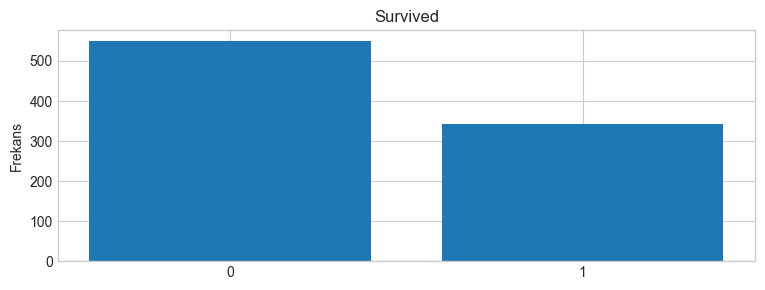

Survived:
Survived
0    549
1    342
Name: count, dtype: int64


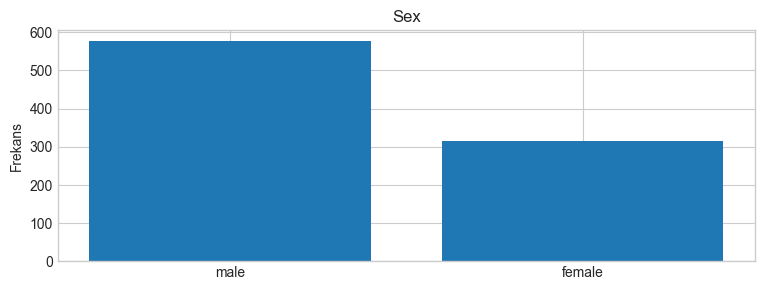

Sex:
Sex
male      577
female    314
Name: count, dtype: int64


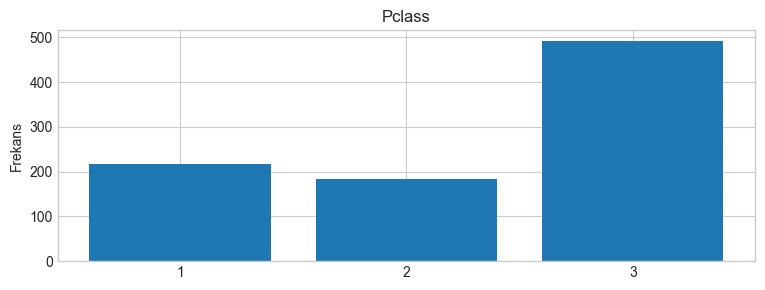

Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


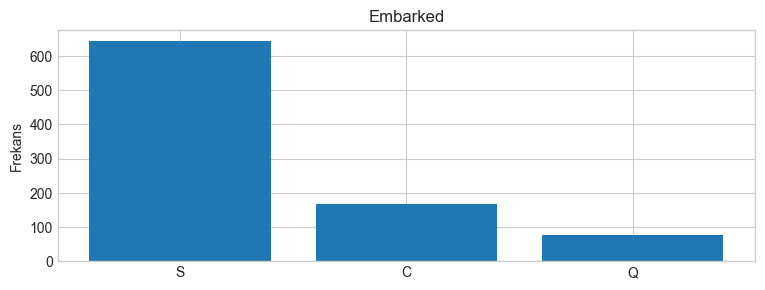

Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


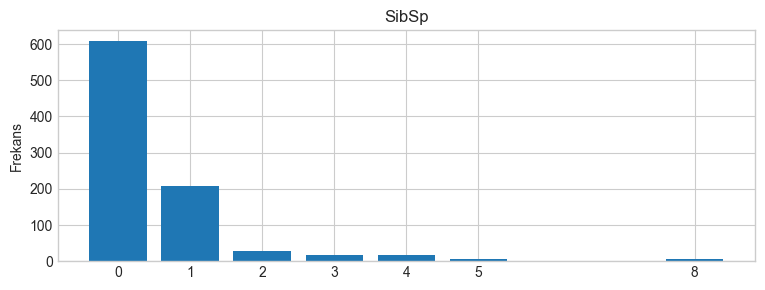

SibSp:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


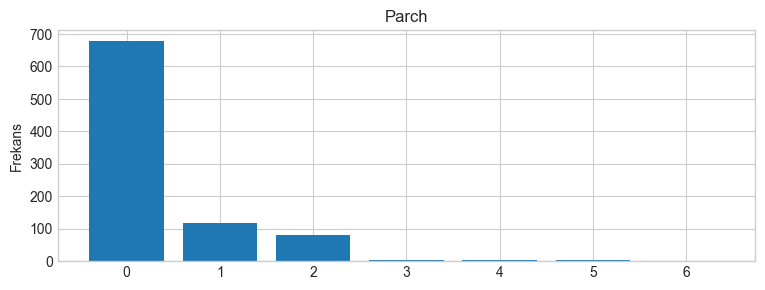

Parch:
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [51]:
# ==============================
# 11. KATEGORİK DEĞİŞKENLERİN GÖRSELLEŞTİRİLMESİ
# ==============================

# Analiz edilecek kategorik değişkenlerin listesi
# Bu değişkenler:
# - Ayrık (discrete) değerler alır
# - Genellikle sınıf, grup veya kategori bilgisini temsil eder
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

# Liste içindeki her bir değişken için:
# - bar_plot fonksiyonu çağrılır
# - Kategorilerin frekans dağılımı görselleştirilir
for c in category1:
    bar_plot(c)


<a id = "6"></a>
# Numerical Variable

In [52]:
# ==============================
# 12. HISTOGRAM (SAYISAL DEĞİŞKEN) FONKSİYONU
# ==============================

def plot_hist(variable):
    """
    Bu fonksiyon sayısal (numerical) değişkenlerin dağılımını
    histogram kullanarak görselleştirir.

    Girdi:
    - variable (str): Sayısal kolon adı (örnek: "Age", "Fare")

    Çıktı:
    - Histogram grafiği (dağılım gösterimi)
    """

    # Grafik boyutunu ayarlıyoruz
    plt.figure(figsize=(9, 3))

    # Histogram çizimi
    # bins = 50:
    # - Veriyi 50 parçaya (aralığa) böler
    # - Dağılımı daha detaylı görmemizi sağlar
    plt.hist(train_df[variable], bins=50)

    # X ekseni etiketi (değişken adı)
    plt.xlabel(variable)

    # Y ekseni etiketi
    plt.ylabel("Frequency")

    # Grafik başlığı
    plt.title("{} dağılımı (Histogram)".format(variable))

    # Grafiği ekrana bastır
    plt.show()


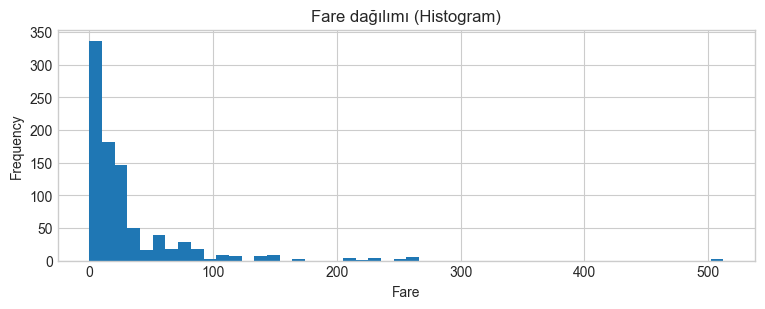

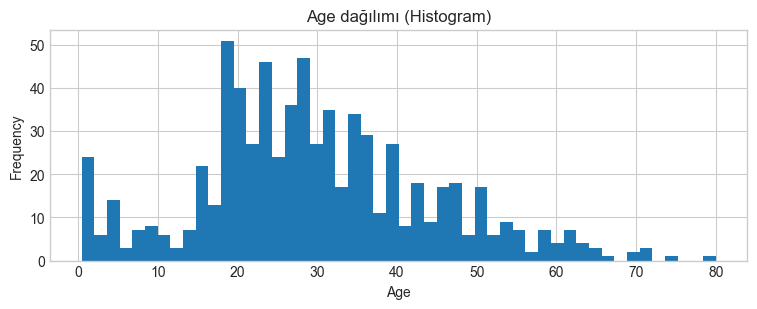

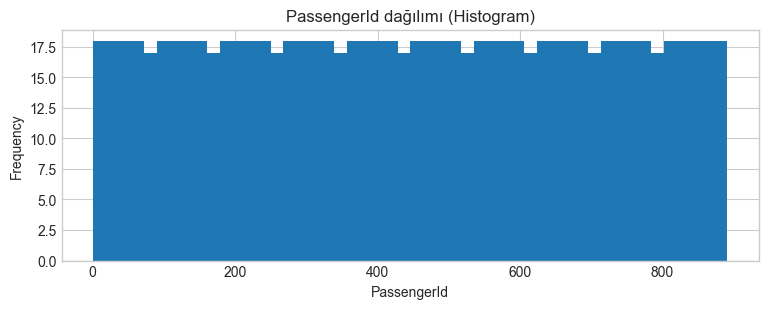

In [53]:
# ==============================
# 13. SAYISAL DEĞİŞKENLERİN DAĞILIM ANALİZİ
# ==============================

# Analiz edilecek sayısal değişkenlerin listesi
# Bu değişkenler:
# - Sürekli (continuous) veya sıralı (ordinal) değerler alır
# - Histogram ile dağılımları incelenir
numericVar = ["Fare", "Age", "PassengerId"]

# Liste içindeki her bir sayısal değişken için:
# - plot_hist fonksiyonu çağrılır
# - Değişkenin dağılımı görselleştirilir
for n in numericVar:
    plot_hist(n)


<a id="7"></a>
# Basic Data Analysis

Bu bölümde, temel değişkenler ile **Survived (hayatta kalma durumu)** arasındaki
ilişkiler incelenir.

Aşağıdaki değişkenlerin hayatta kalma üzerindeki etkisi analiz edilir:

- **Pclass – Survived**  
  Yolcu sınıfının hayatta kalma oranına etkisi

- **Sex – Survived**  
  Cinsiyetin hayatta kalma üzerindeki etkisi

- **SibSp – Survived**  
  Kardeş / eş sayısının hayatta kalmaya etkisi

- **Parch – Survived**  
  Ebeveyn / çocuk sayısının hayatta kalmaya etkisi


In [54]:
# Pclass ile Survived arasındaki ilişkiyi analiz eder (hayatta kalma oranları)
train_df[["Pclass","Survived"]].groupby("Pclass", as_index=False).mean().sort_values(
    by="Survived", ascending=False
)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [55]:
# Sex ile Survived arasındaki ilişkiyi analiz eder
# Amaç: Kadın ve erkek yolcuların hayatta kalma oranlarını karşılaştırmak
train_df[["Sex", "Survived"]].groupby("Sex", as_index=False).mean().sort_values(
    by="Survived", ascending=False
)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
# SibSp (kardeş / eş sayısı) ile Survived arasındaki ilişkiyi analiz eder
# Amaç: Aileyle seyahat etmenin hayatta kalma oranına etkisini incelemek
train_df[["SibSp", "Survived"]].groupby("SibSp", as_index=False).mean().sort_values(
    by="Survived", ascending=False
)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [57]:
# Parch (ebeveyn / çocuk sayısı) ile Survived arasındaki ilişkiyi analiz eder
# Amaç: Yolcunun ebeveyn veya çocukla seyahat etmesinin hayatta kalmaya etkisini incelemek
train_df[["Parch", "Survived"]].groupby("Parch", as_index=False).mean().sort_values(
    by="Survived", ascending=False
)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "8"></a>
# Outliner Detection 

In [58]:
# ==============================
# 14. OUTLIER (AYKIRI DEĞER) TESPİT FONKSİYONU
# ==============================

def detect_outliers(df, features):
    """
    OUTLIER (AYKIRI DEĞER) NEDİR?
    - Veri setindeki diğer gözlemlere göre aşırı büyük veya aşırı küçük olan değerlerdir.
    - Örneğin: Yaşların çoğu 20–60 arasındayken 200 gibi bir değer aykırıdır.

    NEDEN ÖNEMLİ?
    - Aykırı değerler:
      * Ortalamayı bozar
      * Modeli yanlış öğrenmeye zorlar
      * Tahmin performansını düşürür

    BU FONKSİYON NE YAPAR?
    - Verilen sayısal değişkenlerde aykırı değerleri bulur
    - Bir gözlem birden fazla değişkende aykırıysa, onu gerçekten problemli kabul eder

    KULLANILAN YÖNTEM: IQR (Interquartile Range)
    - Verinin orta %50'lik kısmına bakar
    - Gürültüye ve uç değerlere karşı daha dayanıklıdır

    Girdi:
    - df       : Pandas DataFrame (veri seti)
    - features : Aykırı değer analizi yapılacak kolon listesi

    Çıktı:
    - Birden fazla değişkende aykırı olan gözlemlerin index listesi
    """

    # Tüm değişkenler için bulunan aykırı değerlerin index'lerini saklamak için liste
    outlier_indices = []

    # Her bir sayısal değişken için aykırı değer analizi yapılır
    for c in features:
        
        # 1. çeyrek (Q1): Verinin %25'lik alt kısmı
        Q1 = np.percentile(df[c].dropna(), 25)
        
        # 3. çeyrek (Q3): Verinin %75'lik üst kısmı
        Q3 = np.percentile(df[c].dropna(), 75)
        
        # IQR: Orta %50'lik veri aralığı
        IQR = Q3 - Q1
        
        # Aykırı değer sınırı
        # 1.5 * IQR kuralı klasik ve yaygın kullanılan bir eşiktir
        outlier_step = 1.5 * IQR

        # Aykırı değerlerin index'lerini bul
        # Q1 - 1.5*IQR altı ve Q3 + 1.5*IQR üstü
        outlier_list_col = df[
            (df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)
        ].index

        # Bulunan index'leri genel listeye ekle
        outlier_indices.extend(outlier_list_col)

    # Aynı gözlemin kaç farklı değişkende aykırı olduğunu say
    outlier_indices = Counter(outlier_indices)
    
    # Bir gözlem 2'den fazla değişkende aykırıysa,
    # gerçekten problemli kabul edilir
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

    return multiple_outliers


In [59]:
# ==============================
# FONKSİYON ADI vs FONKSİYON ÇAĞIRMA
# ==============================

# print(detect_outliers) NE YAPAR?
# - detect_outliers fonksiyonunu ÇALIŞTIRMAZ
# - Sadece fonksiyonun kendisini (hafızadaki adresini) ekrana yazdırır
# - Bu yüzden analiz yapılmaz, sonuç üretmez

print(detect_outliers)


<function detect_outliers at 0x12cda6610>


In [60]:
# ==============================
# 16. AYKIRI DEĞERLERİ GÖRÜNTÜLEME
# ==============================

# Aykırı değer analizi yapılacak sayısal değişkenler
# Bu değişkenler, uç değer üretme ihtimali yüksek olan kolonlardır
outliers = detect_outliers(
    train_df,
    ["Age", "SibSp", "Parch", "Fare"]
)

# Bulunan aykırı gözlemlerin index'lerini kullanarak
# bu satırları veri setinden görüntülüyoruz
# Böylece:
# - Gerçekten mantıksız değerler mi?
# - Yoksa anlamlı ama nadir gözlemler mi?
kontrol_df = train_df.loc[outliers]

kontrol_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


<a id = "9"></a>
# Missing Value
 * Find Missing Value
 * Fill Missing Value

<a id = "10"></a>
## Find Missing Value

In [61]:
# ==============================
# FIND MISSING VALUE - ÖN HAZIRLIK
# ==============================

# Train veri setinin satır sayısını kaydediyoruz
# NEDEN?
# - Train ve test verilerini birleştireceğiz
# - İşlemler bittikten sonra tekrar ayırabilmek için
train_df_len = len(train_df)

# Train ve test veri setlerini tek bir DataFrame haline getiriyoruz
# NEDEN BU AŞAMADA?
# - Missing value (eksik veri) analizi ve doldurma işlemleri
#   hem train hem test verisine AYNI ŞEKİLDE uygulanmalıdır
#
# axis = 0:
# - Satır bazında birleştirme (alt alta ekleme)
train_df = pd.concat([train_df, test_df], axis=0)

# Index'leri sıfırlıyoruz
# drop=True:
# - Eski index'lerin yeni bir sütun olarak eklenmesini engeller
train_df = train_df.reset_index(drop=True)


In [62]:
# ==============================
# FIND MISSING VALUE
# ==============================

# train_df.isnull():
# - Veri setindeki her hücreyi kontrol eder
# - Değer eksikse True, doluysa False döndürür

# .sum():
# - True değerleri sayıya çevirir (True = 1, False = 0)
# - Böylece her kolonda kaç tane eksik değer olduğunu bulur

# Sonuç olarak:
# - Her sütun için toplam missing (eksik) değer sayısını görürüz
train_df.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<a id = "11"></a>
## Fill Missing Value
 * Embark has 2 missing value
 * Fare has 3 missing value

In [63]:
# ==============================
# FILL MISSING VALUE - EMBARKED (İNCELEME)
# ==============================

# Bu satır:
# - Embarked kolonunda eksik (NaN) değeri olan satırları seçer
# - Eksik değerlerin hangi yolculara ait olduğunu görmemizi sağlar
#
# Amaç:
# - Eksik değerleri körü körüne doldurmak yerine
# - Önce bu gözlemleri incelemek
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


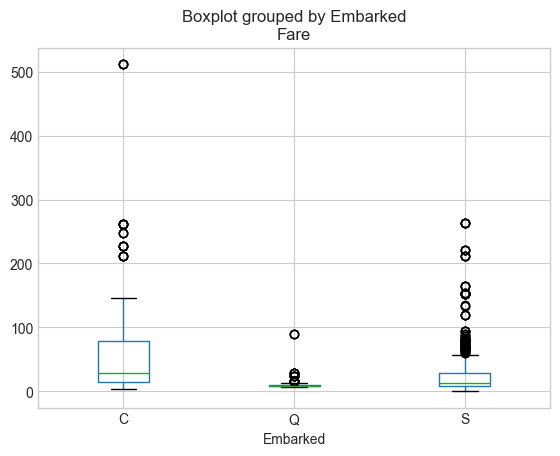

In [64]:
# ==============================
# FILL MISSING VALUE - EMBARKED (FARE İLİŞKİSİ)
# ==============================

# Bu grafik:
# - Embarked (biniş limanı) ile
# - Fare (bilet ücreti)
# arasındaki ilişkiyi incelemek için kullanılır

# Amaç:
# - Eksik olan Embarked değerini doldururken
# - Fare bilgisi bize ipucu veriyor mu görmek

# Boxplot:
# - Her liman için Fare dağılımını gösterir
# - Medyan (ortanca), yayılım ve aykırı değerleri görmemizi sağlar
train_df.boxplot(column="Fare", by="Embarked")

# Grafiği ekrana bastır
plt.show()


In [65]:
# ==============================
# FILL MISSING VALUE - EMBARKED
# ==============================

# Embarked kolonundaki eksik (NaN) değerleri dolduruyoruz
# Burada "C" (Cherbourg) seçilmesinin nedeni:
# - Fare dağılımı analizinde
# - Eksik Embarked değerine sahip yolcuların
#   ücretlerinin C limanına daha yakın olması
train_df["Embarked"] = train_df["Embarked"].fillna("C")

# Doldurma işleminden sonra kontrol ediyoruz
# Eğer bu satır boş bir DataFrame döndürüyorsa:
# - Embarked kolonunda artık eksik değer yok demektir
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [66]:
# ==============================
# FILL MISSING VALUE - FARE (İNCELEME)
# ==============================

# Bu satır:
# - Fare kolonunda eksik (NaN) değeri olan satırları seçer
# - Hangi yolcuların bilet ücretinin eksik olduğunu görmemizi sağlar
#
# Amaç:
# - Fare eksikliği kaç kişide var?
# - Bu eksiklik rastgele mi, yoksa belirli bir gruba mı ait?
# - Nasıl bir doldurma yöntemi kullanacağımıza karar vermek
train_df[train_df["Fare"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [67]:
# ==============================
# FILL MISSING VALUE - FARE
# ==============================

# Fare (bilet ücreti) kolonundaki eksik değerleri dolduruyoruz
# Doldurma stratejisi:
# - Eksik Fare değerine sahip yolcu 3. sınıfta (Pclass = 3)
# - Bu yüzden sadece 3. sınıf yolcuların Fare ortalaması kullanılır
#
# Bu yaklaşım:
# - Tüm veri setinin ortalamasını almaktan daha mantıklıdır
# - Çünkü bilet ücreti yolcu sınıfına göre ciddi şekilde değişir
train_df["Fare"] = train_df["Fare"].fillna(
    np.mean(train_df[train_df["Pclass"] == 3]["Fare"])
)


In [68]:
# ==============================
# FILL MISSING VALUE - FARE (KONTROL)
# ==============================

# Fare kolonunda hâlâ eksik (NaN) değer var mı diye kontrol ediyoruz
# Eğer bu satır:
# - Boş bir DataFrame döndürüyorsa
#   → Fare kolonunda artık eksik değer yok demektir
train_df[train_df["Fare"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "12"></a>

## Visualization

- Correlation Between SibSp, Parch, Age, Fare and Survived


<a id = "13"></a>
## Correlation Between SibSp, Parch, Age, Fare and Survived

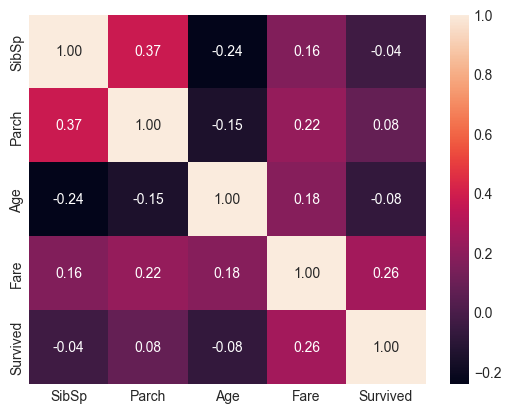

In [69]:
# ==============================
# 18. KORELASYON ANALİZİ (HEATMAP)
# ==============================

# Korelasyon analizi yapılacak sayısal değişkenler
# Amaç:
# - Değişkenler arasındaki doğrusal ilişkileri görmek
# - Hangi değişkenlerin Survived ile daha ilişkili olduğunu anlamak
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]

# .corr():
# - Seçilen değişkenler arasındaki korelasyon katsayılarını hesaplar
# - Değerler -1 ile +1 arasındadır
#
# annot=True:
# - Her hücrenin içine korelasyon değerini yazar
#
# fmt=".2f":
# - Sayıları virgülden sonra 2 basamak olacak şekilde gösterir
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")

# Grafiği ekrana bastır
plt.show()


Fare feature seems to have correlation with survived feature (0.26).

<a id = "14"></a>
# SibSp -- Survived

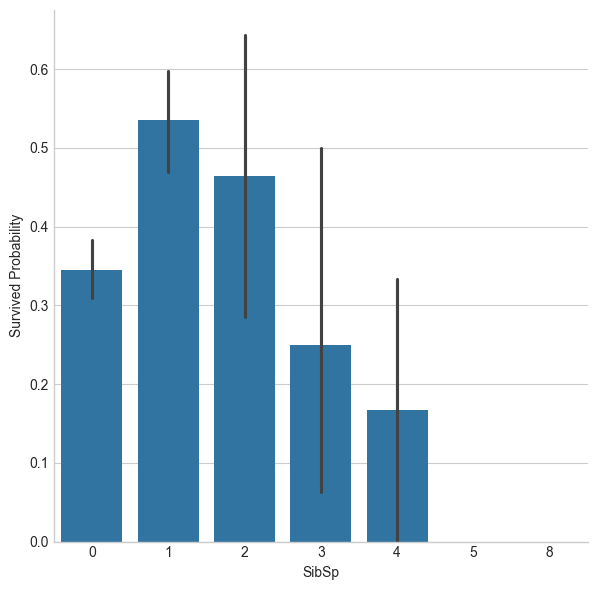

In [70]:
# ==============================
# 19. SIBSP - SURVIVED GÖRSEL ANALİZİ
# ==============================

# Bu grafik:
# - SibSp (kardeş / eş sayısı) ile
# - Survived (hayatta kalma durumu)
# arasındaki ilişkiyi görselleştirir

# sns.catplot:
# - Kategorik değişkenler için kullanılan bir Seaborn fonksiyonudur
# - kind="bar" seçildiğinde:
#   → Her kategori için ortalama Survived değerini gösterir
#   → Bu da hayatta kalma OLASILIĞI anlamına gelir
g = sns.catplot(
    x="SibSp",        # X ekseni: kardeş / eş sayısı
    y="Survived",     # Y ekseni: hayatta kalma durumu (0–1 → oran)
    data=train_df,    # Kullanılan veri seti
    kind="bar",       # Bar grafik
    height=6          # Grafik yüksekliği
)

# Y ekseni etiketini daha açıklayıcı hale getiriyoruz
# Çünkü burada gösterilen şey:
# 0 veya 1 değil, hayatta kalma ORANIDIR
g.set_ylabels("Survived Probability")

# Grafiği ekrana bastır
plt.show()


* Having a lot of SibSp have less chance to survive.
*  if sibsp == 0 or 1 or 2, passenger has more chance to survive
* we can consider a new feature describing these categories.


<a id = "15"></a>
# Parch -- Survived

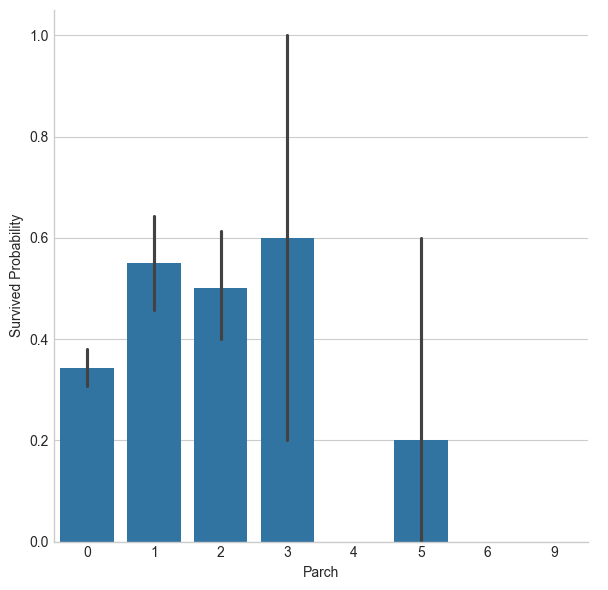

In [71]:
# ==============================
# 20. PARCH - SURVIVED GÖRSEL ANALİZİ
# ==============================

# Bu grafik:
# - Parch (ebeveyn / çocuk sayısı) ile
# - Survived (hayatta kalma durumu)
# arasındaki ilişkiyi görselleştirir

# sns.catplot:
# - Kategorik değişkenler için kullanılan bir Seaborn fonksiyonudur
# - kind="bar" seçildiğinde:
#   → Her Parch değeri için Survived ortalaması hesaplanır
#   → Bu ortalama, hayatta kalma OLASILIĞINI temsil eder
g = sns.catplot(
    x="Parch",        # X ekseni: ebeveyn / çocuk sayısı
    y="Survived",     # Y ekseni: hayatta kalma durumu (0–1 → oran)
    data=train_df,    # Kullanılan veri seti
    kind="bar",       # Bar grafik
    height=6          # Grafik yüksekliği
)

# Y ekseni etiketini açıklayıcı hale getiriyoruz
# Çünkü burada gösterilen şey:
# 0 veya 1 değil, hayatta kalma ORANIDIR
g.set_ylabels("Survived Probability")

# Grafiği ekrana bastır
plt.show()


<a id = "16"></a>
# Age -- Survived

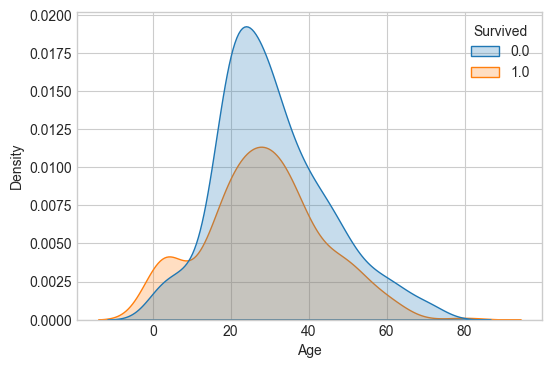

In [72]:
# ==============================
# 21. AGE - SURVIVED DAĞILIM ANALİZİ (KDE PLOT)
# ==============================

# Bu grafik:
# - Age (yaş) değişkeninin dağılımını
# - Survived (hayatta kalma durumu) bazında
# karşılaştırmalı olarak gösterir

# KDE (Kernel Density Estimation):
# - Histogramın yumuşatılmış (smooth) halidir
# - Dağılımın genel şeklini daha net görmemizi sağlar

# figsize:
# - Grafiğin boyutunu ayarlar (genişlik, yükseklik)
plt.figure(figsize=(6, 4))

# sns.kdeplot:
# - Sayısal değişkenlerin dağılımını çizmek için kullanılır
# - hue="Survived":
#   → Hayatta kalanlar (1) ve kalmayanlar (0) ayrı ayrı çizilir
# - fill=True:
#   → Eğrilerin altı doldurulur, görsel yorum daha kolay olur
sns.kdeplot(
    data=train_df,
    x="Age",
    hue="Survived",
    fill=True
)

# Grafiği ekrana bastır
plt.show()


* linkcode
* age <= 10 has a high survival rate,
* oldest passengers (80) survived,
* large number of 20 years old did not survive,
* most passengers are in 15-35 age range,
* use age feature in training
* use age distribution for missing value of age

<a id = "17"></a>
# Pclass -- Survived -- Age

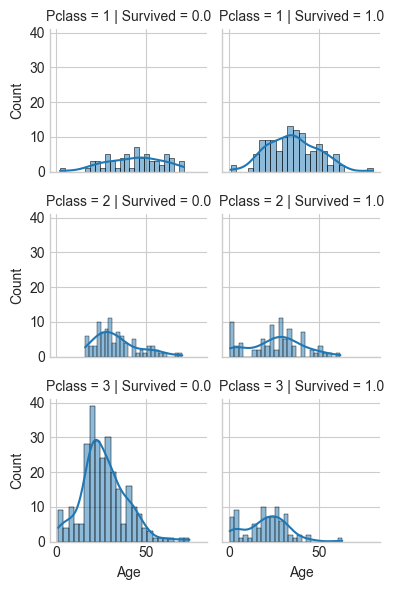

In [73]:
# ==============================
# 22. AGE - SURVIVED - PCLASS ÇOK BOYUTLU ANALİZ
# ==============================

# FacetGrid:
# - Veriyi birden fazla alt grafik (subplot) halinde gösterir
# - Burada:
#   → Sütunlar (col): Survived durumu (0 / 1)
#   → Satırlar (row): Yolcu sınıfı (Pclass)
#
# Amaç:
# - Yaş dağılımının
# - Hem hayatta kalma durumuna
# - Hem de yolcu sınıfına göre
# nasıl değiştiğini görmek
g = sns.FacetGrid(
    train_df,
    col="Survived",   # Sütunlara göre ayırma (hayatta kaldı / kalmadı)
    row="Pclass",     # Satırlara göre ayırma (1., 2., 3. sınıf)
    height=2          # Her grafiğin yüksekliği
)

# Her alt grafik için Age histogramı çizilir
# bins=25:
# - Yaş verisi 25 aralığa bölünür
# kde=True:
# - Histogram üzerine yumuşatılmış dağılım eğrisi eklenir
g.map(sns.histplot, "Age", bins=25, kde=True)

# Lejant eklenir (grafik açıklamalar



* pclass is important feature for model training.

<a id = "18"></a>
# Embarked -- Sex -- Pclass -- Survived

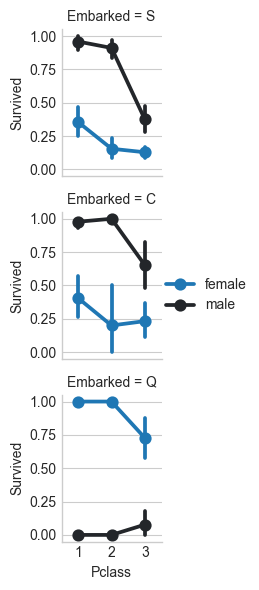

In [74]:
# ==============================
# 23. EMBARKED - PCLASS - SEX - SURVIVED ÇOK BOYUTLU ANALİZ
# ==============================

# FacetGrid:
# - Veriyi birden fazla alt grafik halinde gösterir
# - Burada:
#   → Her satır (row) farklı bir Embarked (biniş limanı) değerini temsil eder
#
# Amaç:
# - Farklı limanlardan binen yolcular için
# - Yolcu sınıfı ve cinsiyetin
# - Hayatta kalma üzerindeki etkisini birlikte incelemek
g = sns.FacetGrid(
    train_df,
    row="Embarked",   # Satırlara göre ayırma (C, Q, S)
    height=2          # Her alt grafiğin yüksekliği
)

# pointplot:
# - X ekseninde kategorik değişken (Pclass)
# - Y ekseninde ortalama Survived değeri (hayatta kalma olasılığı)
# - hue="Sex":
#   → Kadın ve erkekler ayrı ayrı gösterilir
#
# Bu grafik bize:
# - Aynı sınıfta
# - Aynı limanda
# - Kadın ve erkekler arasında
# hayatta kalma farkını gösterir
g.map_dataframe(
    sns.pointplot,
    x="Pclass",       # Yolcu sınıfı
    y="Survived",     # Hayatta kalma durumu (0–1 → oran)
    hue="Sex"         # Cinsiyete göre ayırma
)

# Lejant eklenir (kadın / erkek ayrımı)
g.add_legend()

# Grafikleri ekrana bastır
plt.show()


* Female passengers have much better survival rate than males.
* males have better survşval rate in pclass 3 in C.
* embarked and sex will be used in training.
  

<a id = "19"></a>
# Embarked -- Sex -- Fare -- Survived

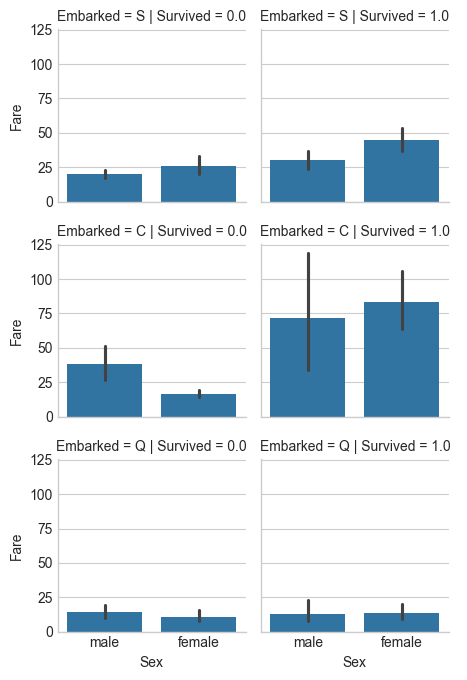

In [75]:
# ==============================
# 24. EMBARKED - SURVIVED - SEX - FARE ÇOK BOYUTLU ANALİZ
# ==============================

# FacetGrid:
# - Veriyi birden fazla alt grafik (subplot) halinde gösterir
# - Burada iki boyutlu bir ayrım yapıyoruz:
#   → Satırlar (row): Embarked (biniş limanı)
#   → Sütunlar (col): Survived (hayatta kalma durumu)
#
# Amaç:
# - Farklı limanlardan binen yolcular için
# - Hayatta kalanlar ve kalmayanlar arasında
# - Kadın ve erkeklerin bilet ücretlerini (Fare) karşılaştırmak
g = sns.FacetGrid(
    train_df,
    row="Embarked",      # Satırlara göre ayırma (C, Q, S)
    col="Survived",      # Sütunlara göre ayırma (0 = öldü, 1 = hayatta)
    height=2.3           # Her alt grafiğin yüksekliği
)

# barplot:
# - X ekseninde kategorik değişken (Sex)
# - Y ekseninde ortalama Fare değeri gösterilir
#
# Bu grafik:
# - Aynı liman ve aynı hayatta kalma durumunda
# - Kadın ve erkeklerin ortalama bilet ücretlerini karşılaştırır
g.map_dataframe(
    sns.barplot,
    x="Sex",             # Cinsiyet
    y="Fare"             # Ortalama bilet ücreti
)

# Lejant eklenir (grafik açıklamaları)
g.add_legend()

# Grafikleri ekrana bastır
plt.show()


* Passsengers who pay higher fare have better survival. Fare can be used as categorical for training.

<a id = "20"></a>
# Fill Missing: Age Feature

In [76]:
# ==============================
# FILL MISSING VALUE - AGE (İNCELEME)
# ==============================

# Bu satır:
# - Age (yaş) kolonunda eksik (NaN) değeri olan satırları seçer
# - Yaşı bilinmeyen yolcuların hangi özelliklere sahip olduğunu görmemizi sağlar
#
# Amaç:
# - Age eksikliği olan yolcular:
#   * Hangi sınıfta?
#   * Hangi cinsiyette?
#   * Aileyle mi seyahat ediyor?
# gibi sorulara bakarak
# yaş değerini nasıl dolduracağımıza karar vermek
train_df[train_df["Age"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


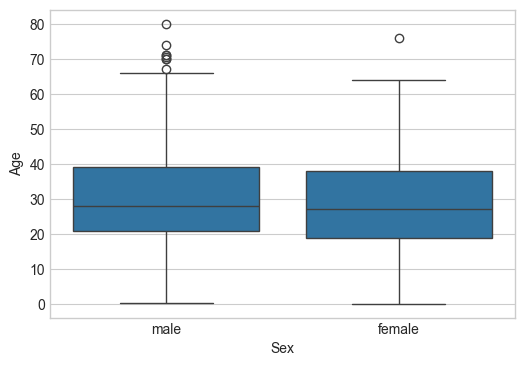

In [77]:
# ==============================
# 25. AGE - SEX İLİŞKİSİ (BOXPLOT)
# ==============================

# Bu grafik:
# - Yaş (Age) dağılımını
# - Cinsiyete (Sex) göre
# karşılaştırmalı olarak gösterir

# Boxplot (kutu grafiği):
# - Ortanca (median)
# - Alt ve üst çeyrekler (Q1 - Q3)
# - Aykırı değerler (outlier)
# hakkında hızlı ve net bilgi verir

# figsize:
# - Grafiğin boyutunu ayarlar
plt.figure(figsize=(6, 4))

# sns.boxplot:
# - X ekseninde kategorik değişken (Sex)
# - Y ekseninde sayısal değişken (Age)
# kullanılır
sns.boxplot(
    x="Sex",    # Cinsiyet (male / female)
    y="Age",    # Yaş
    data=train_df
)

# Grafiği ekrana bastır
plt.show()


Sex is not informative for age prediction, age distribution seems to be same.

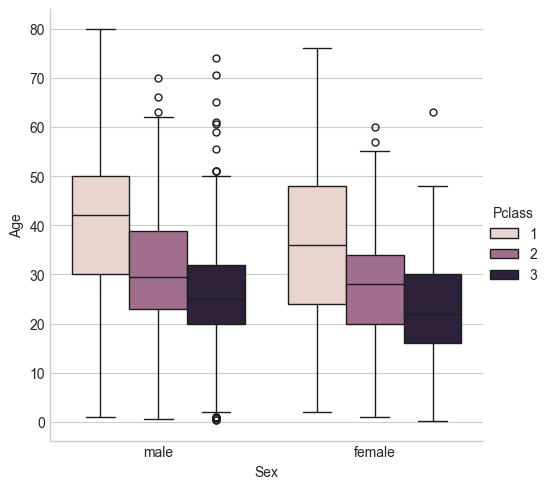

In [78]:
# ==============================
# 26. AGE - SEX - PCLASS İLİŞKİSİ (BOXPLOT)
# ==============================

# Bu grafik:
# - Yaş (Age) dağılımını
# - Cinsiyete (Sex)
# - Yolcu sınıfına (Pclass)
# göre aynı anda karşılaştırmalı olarak gösterir

# sns.catplot:
# - Kategorik değişkenler ile sayısal değişkenleri birlikte görselleştirmek için kullanılır
# - kind="box":
#   → Boxplot (kutu grafiği) çizilir
sns.catplot(
    x="Sex",        # X ekseni: Cinsiyet (male / female)
    y="Age",        # Y ekseni: Yaş
    hue="Pclass",   # Renkler: Yolcu sınıfı (1, 2, 3)
    data=train_df,  # Kullanılan veri seti
    kind="box"      # Kutu grafiği
)

# Grafiği ekrana bastır
plt.show()


1st class passengers are older than 2nd, and 2nd is older than 3rd class.

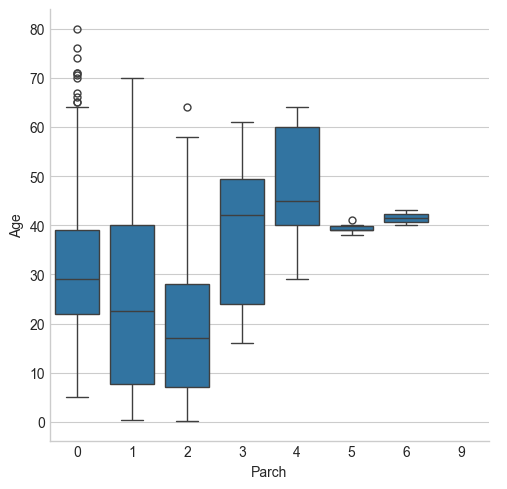

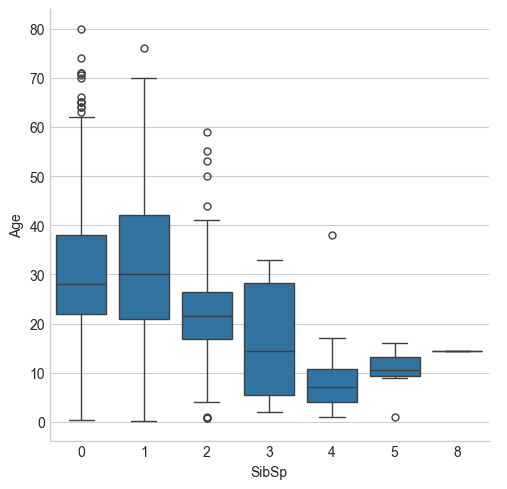

In [79]:
# ==============================
# 27. AGE - AİLE DEĞİŞKENLERİ İLİŞKİSİ (BOXPLOT)
# ==============================

# Bu grafikler:
# - Yaş (Age) ile
# - Aile değişkenleri olan SibSp ve Parch
# arasındaki ilişkiyi incelemek için kullanılır

# ------------------------------------------------
# 1) Parch (ebeveyn / çocuk sayısı) - Age ilişkisi
# ------------------------------------------------

# Amaç:
# - Çocuklu yolcuların yaş dağılımı nasıl?
# - Parch değeri arttıkça yaşta belirgin bir değişim var mı?
sns.catplot(
    x="Parch",       # X ekseni: ebeveyn / çocuk sayısı
    y="Age",         # Y ekseni: yaş
    data=train_df,
    kind="box"       # Kutu grafiği
)

# ------------------------------------------------
# 2) SibSp (kardeş / eş sayısı) - Age ilişkisi
# ------------------------------------------------

# Amaç:
# - Kardeş / eş ile seyahat edenlerin yaş dağılımı nasıl?
# - Tek başına seyahat edenlerle fark var mı?
sns.catplot(
    x="SibSp",       # X ekseni: kardeş / eş sayısı
    y="Age",         # Y ekseni: yaş
    data=train_df,
    kind="box"       # Kutu grafiği
)

# Grafikleri ekrana bastır
plt.show()


In [80]:
# ==============================
# SEX DEĞİŞKENİNİN SAYISALLAŞTIRILMASI (ENCODING)
# ==============================

# Bu satır:
# - Sex değişkenini kategorik (string) yapıdan
# - sayısal (numeric) yapıya dönüştürmek için yazılmıştır
#
# Mantık:
# - "male"  -> 1
# - "female"-> 0
#
# Bu dönüşüm:
# - Makine öğrenmesi modellerinin
#   kategorik verileri anlayabilmesi için gereklidir
#
# NEDEN ŞU ANDA YORUM SATIRI?
# - Şu anda hâlâ:
#   * EDA (Exploratory Data Analysis)
#   * Görselleştirme
#   * Feature engineering
# aşamasındayız
#
# - Sex değişkeni string olarak kalırsa:
#   * Grafikler
#   * Gruplama işlemleri
#   * Okunabilirlik
# daha kolay olur
#
# - Encoding işlemi:
#   * Modelleme aşamasında
#   * En sona yakın yapılmalıdır
#
# Bu yüzden bu satır şu an bilinçli olarak kapalıdır
#train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]


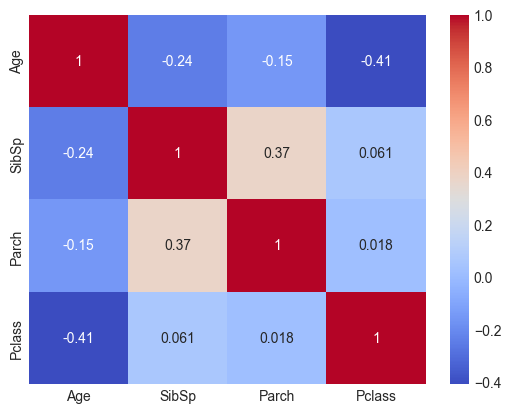

In [81]:
# ==============================
# 28. SAYISAL DEĞİŞKENLER ARASI KORELASYON ANALİZİ
# ==============================

# Bu heatmap:
# - Age (yaş)
# - SibSp (kardeş / eş sayısı)
# - Parch (ebeveyn / çocuk sayısı)
# - Pclass (yolcu sınıfı)
# değişkenleri arasındaki korelasyonu gösterir
#
# Amaç:
# - Age değişkeninin
#   hangi değişkenlerle ilişkili olduğunu görmek
# - Age doldurma ve feature engineering kararlarını
#   veriye dayalı almak

# .corr():
# - Seçilen sayısal değişkenler arasındaki korelasyon katsayılarını hesaplar
# - Değerler -1 ile +1 arasındadır
#
# annot=True:
# - Her hücrede korelasyon değerini yazar
#
# cmap="coolwarm":
# - Kırmızı: pozitif ilişki
# - Mavi   : negatif ilişki
# - Beyaza yakın: zayıf ilişki
sns.heatmap(
    train_df[["Age", "SibSp", "Parch", "Pclass"]].corr(),
    annot=True,
    cmap="coolwarm"
)

# Grafiği ekrana bastır
plt.show()


Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [82]:
# ==============================
# 29. AGE (YAŞ) EKSİK DEĞERLERİNİN DOLDURULMASI
# ==============================

# Yaşı (Age) eksik olan gözlemlerin index'lerini alıyoruz
# Böylece sadece Age'i NaN olan satırlar üzerinde işlem yapacağız
index_nan_age = train_df[train_df["Age"].isnull()].index

# Her bir eksik Age değeri için tek tek işlem yapıyoruz
for i in index_nan_age:
    
    # Aynı özelliklere sahip yolcuları seçiyoruz:
    # - Aynı SibSp (kardeş / eş sayısı)
    # - Aynı Parch (ebeveyn / çocuk sayısı)
    # - Aynı Pclass (yolcu sınıfı)
    #
    # Amaç:
    # - Yaşı bilinmeyen yolcunun
    # - Kendisine BENZER yolcuların yaşlarına bakmak
    age_pred = train_df[
        (train_df["SibSp"] == train_df.loc[i, "SibSp"]) &
        (train_df["Parch"] == train_df.loc[i, "Parch"]) &
        (train_df["Pclass"] == train_df.loc[i, "Pclass"])
    ]["Age"].median()

    # Tüm veri setinin genel Age medyanını hesaplıyoruz
    # Bu değer, yedek (fallback) olarak kullanılacak
    age_med = train_df["Age"].median()

    # Eğer benzer yolculardan hesaplanan median Age NaN değilse:
    # - Bu değeri kullan
    if not np.isnan(age_pred):
        train_df.loc[i, "Age"] = age_pred
    
    # Eğer benzer yolcu bulunamazsa (age_pred NaN ise):
    # - Genel Age medyanını kullan
    else:
        train_df.loc[i, "Age"] = age_med


In [83]:
# ==============================
# FILL MISSING VALUE - AGE (KONTROL)
# ==============================

# Age kolonunda hâlâ eksik (NaN) değer var mı diye kontrol ediyoruz
# Eğer bu satır:
# - Boş (empty) bir DataFrame döndürüyorsa
#   → Age kolonundaki tüm eksik değerler başarıyla doldurulmuştur
train_df[train_df["Age"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "21"></a>
# Feature Engineering

<a id = "22"></a>
## Name -- Title

In [84]:
# ==============================
# FEATURE ENGINEERING - NAME (İNCELEME)
# ==============================

# Bu satır:
# - Name (isim) kolonunun ilk 10 satırını gösterir
# - İsimlerin hangi formatta yazıldığını anlamamızı sağlar
#
# Amaç:
# - İsimlerin içinde geçen ünvanları (Title) fark etmek
#   Örnek ünvanlar:
#   Mr, Mrs, Miss, Master, Dr, Rev, vb.
#
# Bu inceleme:
# - Bir sonraki adımda Name içinden Title çıkarmamız için gereklidir
train_df["Name"].head(10)


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: str

In [85]:
# ==============================
# FEATURE ENGINEERING - TITLE OLUŞTURMA
# ==============================

# Name kolonunu ayrı bir değişkene alıyoruz
# Bu sadece kodu daha okunabilir yapmak için
name = train_df["Name"]

# Name bilgisinin içinden Title (ünvan) bilgisini çıkarıyoruz
# Titanic veri setinde isim formatı genellikle şöyledir:
# "Soyad, Title. İsim"
#
# Örnek:
# "Braund, Mr. Owen Harris"
#
# Adım adım ne oluyor?
# 1) i.split(".")[0]
#    → Noktadan ayır ve ilk kısmı al
#    → "Braund, Mr"
#
# 2) .split(",")[-1]
#    → Virgülden ayır ve son kısmı al
#    → " Mr"
#
# 3) .strip()
#    → Başındaki ve sonundaki boşlukları temizle
#    → "Mr"
#
# Sonuç:
# - Her yolcu için sadece ünvan bilgisi elde edilir
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]


In [86]:
# ==============================
# FEATURE ENGINEERING - TITLE (KONTROL)
# ==============================

# Oluşturduğumuz Title kolonunun ilk 10 satırını görüntülüyoruz
# Amaç:
# - Name içinden Title bilgisinin doğru şekilde çıkarılıp çıkarılmadığını kontrol etmek
# - Beklediğimiz değerleri (Mr, Miss, Mrs, Master, vb.) görüp görmediğimizi anlamak
train_df["Title"].head(10)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: str

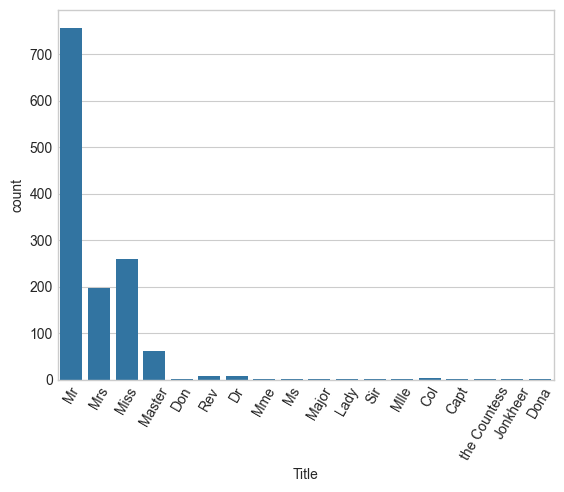

In [87]:
# ==============================
# FEATURE ENGINEERING - TITLE DAĞILIMI (COUNT PLOT)
# ==============================

# Bu grafik:
# - Oluşturduğumuz Title (ünvan) değişkeninin
# - Veri setinde kaç kez geçtiğini görselleştirir
#
# Amaç:
# - Hangi ünvanlar çok sık?
# - Hangi ünvanlar çok nadir (rare)?
# - Birleştirme (grouping) yapmamız gerekiyor mu?
sns.countplot(
    x="Title",
    data=train_df
)

# X eksenindeki yazılar üst üste binmesin diye döndürüyoruz
plt.xticks(rotation=60)

# Grafiği ekrana bastır
plt.show()


In [88]:
# ==============================
# FEATURE ENGINEERING - TITLE DÜZENLEME ve ENCODING
# ==============================

# 1) Nadir (rare) ünvanları tek bir kategori altında topluyoruz
# Amaç:
# - Çok az sayıda görülen ünvanların modeli yanıltmasını önlemek
# - Modelin genelleme yapmasını kolaylaştırmak
#
# Bu ünvanlar sosyal statü veya meslek belirtir,
# ancak veri sayısı az olduğu için tek başlıkta toplanır
train_df["Title"] = train_df["Title"].replace(
    ["Lady", "the Countess", "Capt", "Col", "Don", "Dr",
     "Major", "Rev", "Sir", "Jonkheer", "Dona"],
    "other"
)

# 2) Title değişkenini sayısal (kategorik) değerlere çeviriyoruz
# Çünkü makine öğrenmesi modelleri string (metin) ile çalışamaz
#
# Kodlama mantığı (yaş ve sosyal yapı bazlı):
# 0 → Master  (genellikle çocuk)
# 1 → Miss / Ms / Mlle / Mrs  (kadın yolcular)
# 2 → Mr      (yetişkin erkek)
# 3 → other   (nadir ünvanlar)
#
# Bu sıralama rastgele değil:
# - Yaş ve hayatta kalma davranışlarını yansıtacak şekilde seçilmiştir
train_df["Title"] = [
    0 if i == "Master"
    else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs"
    else 2 if i == "Mr"
    else 3
    for i in train_df["Title"]
]

# Oluşturulan Title değişkeninin ilk 20 satırını kontrol ediyoruz
# Amaç:
# - Kodlamanın doğru yapıldığını doğrulamak
train_df["Title"].head(20)


0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

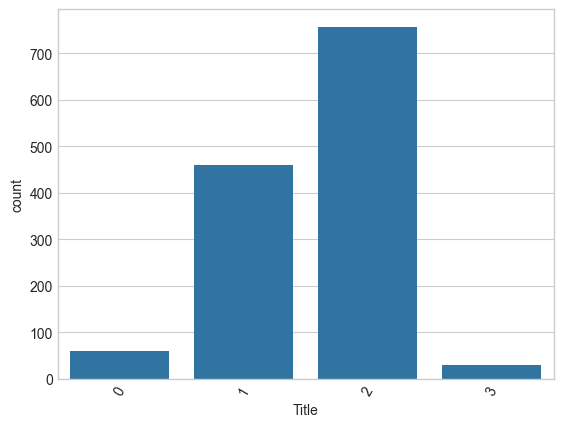

In [89]:
# ==============================
# FEATURE ENGINEERING - TITLE (ENCODING SONRASI KONTROL)
# ==============================

# Bu grafik:
# - Title değişkenini sayısallaştırdıktan (encoding) sonra
# - Oluşan kategorilerin dağılımını görselleştirir
#
# Amaç:
# - Kaç farklı Title kategorisi kaldığını görmek
# - Her kategoride yeterli sayıda gözlem olup olmadığını kontrol etmek
# - Rare (nadir) title birleştirmesinin işe yarayıp yaramadığını doğrulamak
sns.countplot(
    x="Title",
    data=train_df
)

# X eksenindeki değerler üst üste binmesin diye döndürüyoruz
plt.xticks(rotation=60)

# Grafiği ekrana bastır
plt.show()


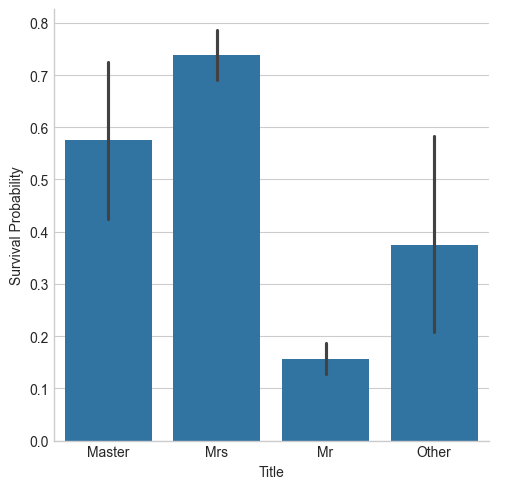

In [90]:
# ==============================
# FEATURE ENGINEERING - TITLE vs SURVIVED ANALİZİ
# ==============================

# Bu grafik:
# - Title (ünvan) ile
# - Survived (hayatta kalma durumu)
# arasındaki ilişkiyi görselleştirir
#
# kind="bar":
# - Her Title kategorisi için
# - Survived ortalamasını gösterir
# - Bu ortalama = hayatta kalma OLASILIĞI demektir
g = sns.catplot(
    x="Title",        # X ekseni: Title (sayısal olarak encode edilmiş)
    y="Survived",     # Y ekseni: hayatta kalma durumu (0–1 → oran)
    data=train_df,
    kind="bar"
)

# X eksenindeki sayısal Title değerlerini
# daha anlaşılır isimlerle değiştiriyoruz
#
# Title encoding sırası:
# 0 → Master
# 1 → Miss / Mrs
# 2 → Mr
# 3 → Other
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])

# Y ekseni etiketini açıklayıcı hale getiriyoruz
g.set_ylabels("Survival Probability")

# Grafiği ekrana bastır
plt.show()


In [91]:
# ==============================
# FEATURE ENGINEERING - NAME KOLONUNU SİLME
# ==============================

# Name kolonu artık kullanılmayacağı için veri setinden kaldırılır
# NEDEN?
# - Name değişkeninden gerekli bilgi (Title) zaten çıkarıldı
# - Ham Name metni:
#   * Çok fazla farklı değer içerir
#   * Modele doğrudan bir katkı sağlamaz
#   * Gürültü (noise) oluşturur
#
# axis=1:
# - Sütun (column) sildiğimizi belirtir
#
# inplace=True:
# - Değişikliği kalıcı olarak uygular
# - train_df doğrudan güncellenir
train_df.drop(labels=["Name"], axis=1, inplace=True)


In [92]:
# ==============================
# VERİ SETİ SON DURUM KONTROLÜ
# ==============================

# train_df.head():
# - Veri setinin ilk 5 satırını gösterir
# - Feature engineering ve missing value işlemlerinden sonra
#   verinin nasıl göründüğünü hızlıca kontrol etmemizi sağlar
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [93]:
# ==============================
# FEATURE ENGINEERING - TITLE (ONE-HOT ENCODING)
# ==============================

# pd.get_dummies:
# - Kategorik (sayısal olsa bile kategorik anlam taşıyan) değişkenleri
# - One-Hot Encoding yöntemiyle dönüştürür
#
# One-Hot Encoding nedir?
# - Her kategori için ayrı bir sütun oluşturur
# - O kategoriye aitse 1, değilse 0 yazar
#
# NEDEN TITLE İÇİN GEREKLİ?
# - Title sayısal gibi görünse de (0,1,2,3)
#   bu sayılar arasında matematiksel bir büyüklük ilişkisi YOK
# - Modelin "3 > 1" gibi yanlış bir anlam çıkarmasını istemeyiz
train_df = pd.get_dummies(train_df, columns=["Title"])

# Dönüşüm sonrası veri setinin ilk 5 satırını kontrol ediyoruz
# Amaç:
# - Yeni Title sütunlarının oluştuğunu görmek
# - Eski Title kolonunun kaldırıldığını doğrulamak
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


<a id = "23"></a>
 ## Family Size

In [94]:
# ==============================
# ONE-HOT ENCODING SONRASI VERİ SETİ KONTROLÜ
# ==============================

# train_df.head():
# - Veri setinin ilk 5 satırını gösterir
# - One-Hot Encoding işleminden sonra:
#   * Yeni Title sütunları oluşmuş mu?
#   * Eski Title kolonu kaldırılmış mı?
#   * Diğer kolonlar (Age, Fare, vb.) yerinde mi?
# hızlıca kontrol etmemizi sağlar
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [95]:
# ==============================
# FEATURE ENGINEERING - FAMILY SIZE (FSIZE)
# ==============================

# Fsize (Family Size) değişkenini oluşturuyoruz
# Formül:
# - SibSp : kardeş / eş sayısı
# - Parch : ebeveyn / çocuk sayısı
# - +1    : yolcunun kendisi
#
# Amaç:
# - Yolcunun gemide toplam kaç kişilik bir aileyle seyahat ettiğini bulmak
# - SibSp ve Parch'ı tek bir anlamlı feature altında toplamak
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1


In [96]:
# ==============================
# VERİ SETİ GÜNCEL DURUM KONTROLÜ
# ==============================

# train_df.head():
# - Veri setinin ilk 5 satırını gösterir
# - Son eklenen Fsize değişkeninin:
#   * Oluşup oluşmadığını
#   * Doğru hesaplanıp hesaplanmadığını
# kontrol etmemizi sağlar
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


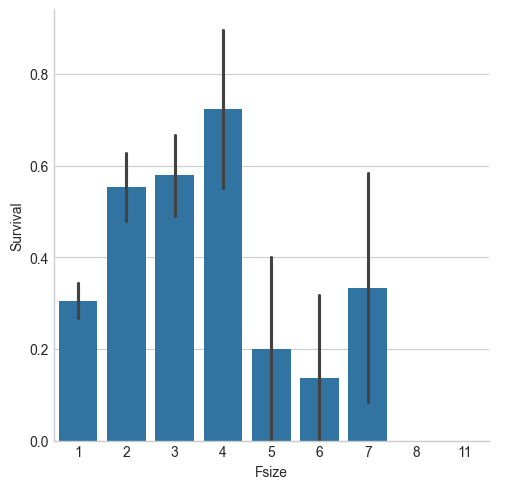

In [97]:
# ==============================
# FEATURE ENGINEERING - FSIZE vs SURVIVED ANALİZİ
# ==============================

# Bu grafik:
# - Fsize (aile büyüklüğü) ile
# - Survived (hayatta kalma durumu)
# arasındaki ilişkiyi görselleştirir
#
# kind="bar":
# - Her Fsize değeri için
# - Survived ortalamasını gösterir
# - Bu ortalama = hayatta kalma OLASILIĞI anlamına gelir
g = sns.catplot(
    x="Fsize",        # X ekseni: aile büyüklüğü
    y="Survived",     # Y ekseni: hayatta kalma durumu (0–1 → oran)
    data=train_df,
    kind="bar"
)

# Y ekseni etiketini daha açıklayıcı hale getiriyoruz
g.set_ylabels("Survival")

# Grafiği ekrana bastır
plt.show()


In [98]:
# ==============================
# FEATURE ENGINEERING - FAMILY SIZE (GRUPLAMA)
# ==============================

# family_size adlı yeni bir değişken oluşturuyoruz
# Amaç:
# - Fsize (aile büyüklüğü) değişkenini
# - Daha sade ve modele daha kolay öğrenilebilir hale getirmek
#
# Mantık:
# - Fsize < 5  → 1  (tek başına veya küçük aile)
# - Fsize >= 5 → 0  (kalabalık aile)
#
# Bu gruplama:
# - Titanic verisinde gözlemlenen hayatta kalma desenine dayanır
# - Küçük ailelerin hayatta kalma ihtimali daha yüksektir
train_df["family_size"] = [
    1 if i < 5 else 0
    for i in train_df["Fsize"]
]


In [99]:
# ==============================
# VERİ SETİ SON HALİ (İLK 10 SATIR)
# ==============================

# train_df.head(10):
# - Veri setinin ilk 10 satırını gösterir
# - Özellikle şu kontroller için kullanılır:
#   * family_size kolonu doğru hesaplanmış mı?
#   * Fsize ile family_size arasında mantık tutarlı mı?
#   * Daha önce eklenen feature’lar (Title_*, Age, Fare vb.) yerinde mi?
train_df.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0.0,3,male,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


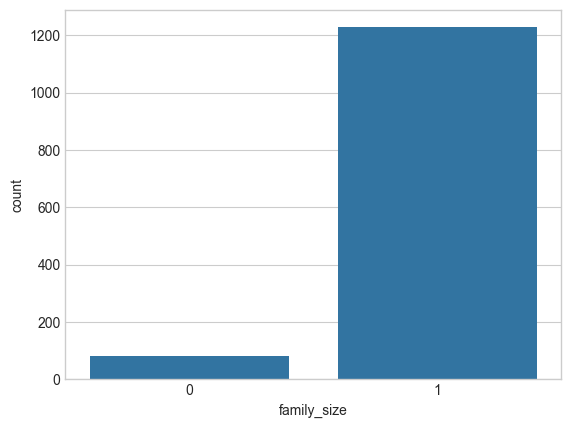

In [100]:
# ==============================
# FEATURE ENGINEERING - FAMILY_SIZE DAĞILIMI (COUNT PLOT)
# ==============================

# Bu grafik:
# - Oluşturduğumuz family_size değişkeninin
# - Veri setinde kaç kez geçtiğini gösterir
#
# family_size tanımı:
# 1 → Tek başına veya küçük aile (Fsize < 5)
# 0 → Kalabalık aile (Fsize ≥ 5)
#
# Amaç:
# - Gruplamanın veri setinde dengeli olup olmadığını görmek
# - Aşırı dengesiz bir sınıf var mı kontrol etmek
sns.countplot(
    x="family_size",
    data=train_df
)

# Grafiği ekrana bastır
plt.show()


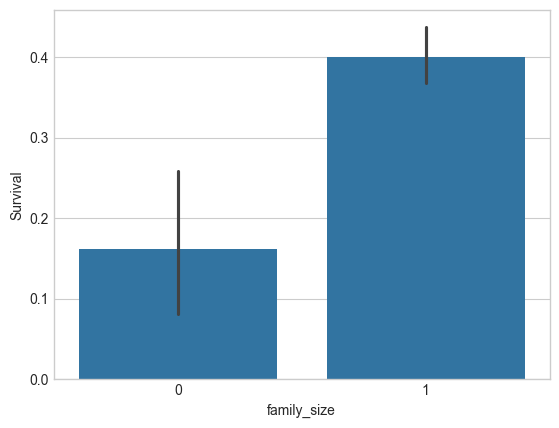

In [101]:
# ==============================
# FEATURE ENGINEERING - FAMILY_SIZE (GÜVENLİ OLUŞTURMA + ANALİZ)
# ==============================

# Eğer family_size kolonu daha önce oluşturulmamışsa:
# - SibSp (kardeş / eş sayısı)
# - Parch (ebeveyn / çocuk sayısı)
# kullanılarak family_size oluşturulur
#
# Bu kontrol neden önemli?
# - Notebook tekrar tekrar çalıştırıldığında
#   aynı kolonu ikinci kez oluşturmaya çalışıp hata almamak için
if "family_size" not in train_df.columns:
    train_df["family_size"] = train_df["SibSp"] + train_df["Parch"] + 1

# Bu grafik:
# - family_size (aile büyüklüğü) ile
# - Survived (hayatta kalma durumu)
# arasındaki ilişkiyi gösterir
#
# sns.barplot:
# - X eksenindeki her family_size değeri için
# - Survived ortalamasını hesaplar
# - Bu ortalama = hayatta kalma OLASILIĞI demektir
sns.barplot(
    x="family_size",
    y="Survived",
    data=train_df
)

# Y ekseni etiketini daha açıklayıcı hale getiriyoruz
plt.ylabel("Survival")

# Grafiği ekrana bastır
plt.show()


Small familes have more chance to survive than large families.

In [102]:
# ==============================
# FEATURE ENGINEERING - FAMILY_SIZE (ONE-HOT ENCODING)
# ==============================

# pd.get_dummies:
# - Kategorik değişkenleri One-Hot Encoding yöntemiyle dönüştürür
#
# Burada family_size:
# - Sayısal görünse bile (0 / 1)
# - Aslında kategorik bir anlam taşır
#   (küçük aile / kalabalık aile)
#
# Bu yüzden:
# - Modelin "1 > 0" gibi yanlış bir sıralama öğrenmemesi için
# - One-Hot Encoding uygulanır
train_df = pd.get_dummies(train_df, columns=["family_size"])

# Encoding sonrası veri setinin ilk 5 satırını kontrol ediyoruz
# Amaç:
# - family_size_0 ve family_size_1 sütunlarının oluştuğunu görmek
# - Eski family_size kolonunun kaldırıldığını doğrulamak
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


<a id = "24"></a>
## Embarked

In [103]:
# ==============================
# FEATURE ENGINEERING - EMBARKED (KONTROL)
# ==============================

# Embarked kolonunun ilk birkaç satırını görüntülüyoruz
# Amaç:
# - Değerlerin hangi formatta olduğunu görmek
# - 'C', 'Q', 'S' gibi kategorik değerlerin
#   doğru ve temiz şekilde durduğunu kontrol etmek
train_df["Embarked"].head()


0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: str

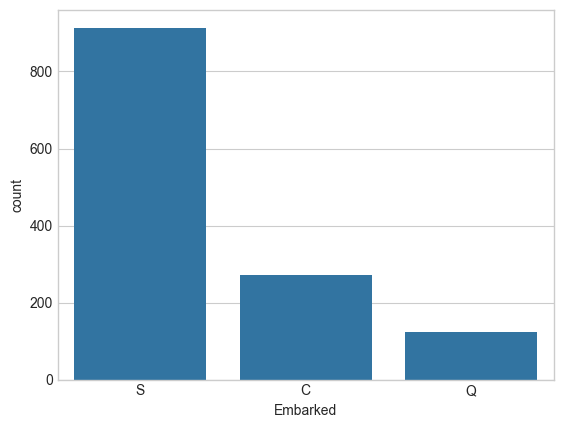

In [104]:
# ==============================
# FEATURE ENGINEERING - EMBARKED DAĞILIMI (COUNT PLOT)
# ==============================

# Bu grafik:
# - Embarked (biniş limanı) değişkeninin
# - Veri setinde kaç kez geçtiğini gösterir
#
# Amaç:
# - Hangi limanın daha baskın olduğunu görmek
# - Encoding sonrası aşırı dengesiz bir yapı oluşur mu kontrol etmek
sns.countplot(
    x="Embarked",
    data=train_df
)

# Grafiği ekrana bastır
plt.show()


In [105]:
# ==============================
# FEATURE ENGINEERING - EMBARKED (ONE-HOT ENCODING)
# ==============================

# pd.get_dummies:
# - Kategorik değişkenleri One-Hot Encoding yöntemiyle dönüştürür
#
# Embarked değişkeni:
# - 'C', 'Q', 'S' gibi kategorik (metinsel) değerler içerir
# - Makine öğrenmesi modelleri bu tür metinleri doğrudan anlayamaz
#
# Bu yüzden:
# - Her bir Embarked kategorisi için
# - Ayrı bir sütun oluşturulur
# - Yolcu o limandan bindiyse 1, değilse 0 yazılır
train_df = pd.get_dummies(train_df, columns=["Embarked"])

# Encoding sonrası veri setinin ilk 5 satırını kontrol ediyoruz
# Amaç:
# - Embarked_C, Embarked_Q, Embarked_S sütunlarının oluştuğunu görmek
# - Eski Embarked kolonunun kaldırıldığını doğrulamak
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


<a id = "25"></a>
## Ticket

In [106]:
# ==============================
# FEATURE ENGINEERING - TICKET (İNCELEME)
# ==============================

# Ticket kolonunun ilk 20 satırını görüntülüyoruz
# Amaç:
# - Ticket değerlerinin formatını görmek
# - Sayısal mı, metinsel mi, karışık mı olduğunu anlamak
# - Ortak desenler (prefix, grup, tekrar eden numaralar) var mı kontrol etmek
train_df["Ticket"].head(20)


0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: str

In [107]:
# Örnek bir Ticket değeri tanımlıyoruz
# Bu tür değerler Titanic veri setinde sıkça görülür
a = "A/5. 2151"

# Bu satırın amacı:
# - Ticket bilgisinden anlamlı olan "ön ek (prefix)" kısmını çıkarmak
# - Nokta, slash gibi gereksiz karakterleri temizlemek
# - Sadece harf + sayı içeren prefix'i elde etmek

a.replace(".", "")      # Ticket içindeki nokta (.) karakterini siler
a.replace("/", "")      # Ticket içindeki slash (/) karakterini siler
a.strip()               # Başta ve sonda boşluk varsa temizler
a.split(" ")[0]         # Boşluktan ayırır ve ilk parçayı (prefix) alır


'A/5.'

In [108]:
# ==============================
# FEATURE ENGINEERING - TICKET PREFIX (DÖNGÜ İLE)
# ==============================

# Boş bir liste oluşturuyoruz
# Bu listeye her yolcu için işlenmiş ticket bilgisini ekleyeceğiz
tickets = []

# train_df içindeki Ticket sütunundaki her değeri tek tek dolaşıyoruz
for i in list(train_df.Ticket):

    # Eğer ticket tamamen rakamlardan oluşmuyorsa:
    # (yani içinde harf varsa)
    if not i.isdigit():
        
        # Ticket içindeki:
        # - nokta (.)
        # - slash (/)
        # karakterlerini siliyoruz
        # ardından boşluklardan ayırıp ilk parçayı alıyoruz
        #
        # Amaç:
        # "A/5. 2151"  → "A5"
        # "PC 17599"   → "PC"
        tickets.append(
            i.replace(".", "")
             .replace("/", "")
             .strip()
             .split(" ")[0]
        )

    # Eğer ticket sadece rakamlardan oluşuyorsa:
    # (yani harfli bir prefix yoksa)
    else:
        # Bu durumu özel bir etiketle işaretliyoruz
        # "x" = harfli prefix yok
        tickets.append("x")

# Oluşturduğumuz tickets listesini
# train_df içindeki Ticket sütununun yerine yazıyoruz
train_df["Ticket"] = tickets


In [109]:
# ==============================
# VERİ SETİ SON HALİ – GENEL KONTROL
# ==============================

# train_df.head():
# - Veri setinin ilk 5 satırını gösterir
# - Şu ana kadar yapılan tüm işlemlerin
#   tabloya doğru yansıyıp yansımadığını kontrol eder
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A5,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,female,38.0,1,0,PC,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,female,26.0,0,0,STONO2,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,female,35.0,1,0,x,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,male,35.0,0,0,x,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [110]:
# ==============================
# VERİ SETİ – MODELLEME ÖNCESİ SON KONTROL
# ==============================

# train_df.head():
# - Veri setinin ilk 5 satırını gösterir
# - Tüm feature engineering ve encoding işlemlerinden sonra
#   verinin son halini hızlıca kontrol etmemizi sağlar
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A5,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,female,38.0,1,0,PC,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,female,26.0,0,0,STONO2,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,female,35.0,1,0,x,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,male,35.0,0,0,x,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [111]:
# ==============================
# FEATURE ENGINEERING - TICKET (ONE-HOT ENCODING)
# ==============================

# pd.get_dummies:
# - Kategorik değişkenleri One-Hot Encoding yöntemiyle dönüştürür
#
# Burada Ticket:
# - Artık uzun numaralar değil
# - "A5", "PC", "x" gibi sade prefix değerleri içeriyor
#
# prefix="T":
# - Oluşturulacak sütunların başına "T_" ekler
# - Bu sayede:
#   * Sütunların Ticket'a ait olduğu net olur
#   * İleride Embarked, Title vb. ile karışmaz
train_df = pd.get_dummies(
    train_df,
    columns=["Ticket"],
    prefix="T"
)

# Encoding sonrası veri setinin ilk 10 satırını kontrol ediyoruz
# Amaç:
# - T_A5, T_PC, T_x gibi sütunların oluştuğunu görmek
# - Eski Ticket kolonunun kaldırıldığını doğrulamak
train_df.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0.0,1,male,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


<a id = "26"></a>
## PClass

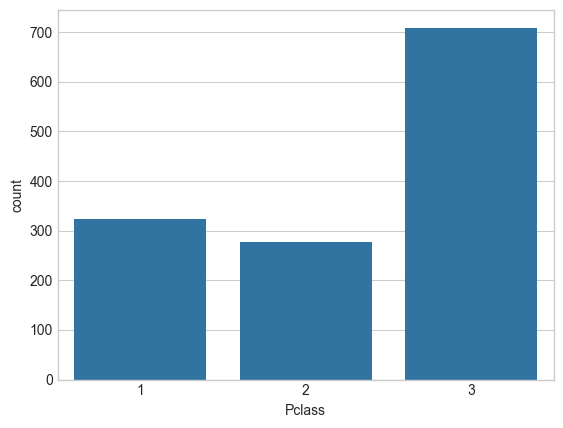

In [112]:
# ==============================
# FEATURE ANALYSIS - PCLASS DAĞILIMI (COUNT PLOT)
# ==============================

# Bu grafik:
# - Pclass (yolcu sınıfı) değişkeninin
# - Veri setinde kaç kez geçtiğini gösterir
#
# Pclass anlamı:
# 1 → 1. sınıf (üst sınıf yolcular)
# 2 → 2. sınıf
# 3 → 3. sınıf (alt sınıf yolcular)
#
# Amaç:
# - Sınıfların veri setinde dengeli olup olmadığını görmek
# - Modelin her sınıfı yeterince görebildiğini kontrol etmek
sns.countplot(
    x="Pclass",
    data=train_df
)

# Grafiği ekrana bastır
plt.show()


In [113]:
# ==============================
# FEATURE ENGINEERING - PCLASS (KATEGORİK DÖNÜŞÜM + ENCODING)
# ==============================

# 1) Pclass değişkenini kategorik tipe çeviriyoruz
# NEDEN?
# - Pclass sayısal görünse de (1, 2, 3)
# - Bu sayılar arasında matematiksel bir büyüklük ilişkisi yoktur
# - 3 > 1 demek "daha fazla" anlamına gelmez
train_df["Pclass"] = train_df["Pclass"].astype("category")

# 2) Pclass için One-Hot Encoding uyguluyoruz
# pd.get_dummies:
# - Her yolcu sınıfı için ayrı bir sütun oluşturur
# - Yolcu o sınıftaysa 1, değilse 0 yazar
train_df = pd.get_dummies(
    train_df,
    columns=["Pclass"]
)

# Encoding sonrası veri setinin ilk 5 satırını kontrol ediyoruz
# Amaç:
# - Pclass_1, Pclass_2, Pclass_3 sütunlarının oluştuğunu görmek
# - Eski Pclass kolonunun kaldırıldığını doğrulamak
train_df.head()


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1.0,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1.0,female,26.0,0,0,7.9250,NaN,False,True,...,False,True,False,False,False,False,False,False,False,True
3,4,1.0,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0.0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


<a id = "27"></a>
# Sex


In [114]:
# ==============================
# FEATURE ENGINEERING - SEX (KATEGORİK DÖNÜŞÜM + ENCODING)
# ==============================

# 1) Sex değişkenini kategorik tipe çeviriyoruz
# NEDEN?
# - Sex metinsel (male / female) bir değişkendir
# - Modelleme öncesi bunun kategorik olduğunu açıkça belirtmek iyi pratiktir
train_df["Sex"] = train_df["Sex"].astype("category")

# 2) Sex değişkeni için One-Hot Encoding uyguluyoruz
# pd.get_dummies:
# - 'male' ve 'female' için ayrı sütunlar oluşturur
# - Yolcu o cinsiyetteyse 1, değilse 0 yazar
train_df = pd.get_dummies(
    train_df,
    columns=["Sex"]
)

# Encoding sonrası veri setinin ilk 5 satırını kontrol ediyoruz
# Amaç:
# - Sex_female ve Sex_male sütunlarının oluştuğunu görmek
# - Eski Sex kolonunun kaldırıldığını doğrulamak
train_df.head()


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0.0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1.0,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1.0,26.0,0,0,7.9250,NaN,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,4,1.0,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0.0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


<a id = "28"></a>
## Drop Passenger ID and Cabin

In [115]:
# ==============================
# MODELLEME ÖNCESİ - GEREKSİZ SÜTUNLARI SİLME
# ==============================

# Bu kod:
# - PassengerId ve Cabin sütunlarını
# - EĞER veri setinde varsa
# güvenli bir şekilde siler
#
# NEDEN BU ŞEKİLDE YAZILDI?
# - Notebook'u baştan sona tekrar çalıştırdığında
# - Bu sütunlar daha önce silinmiş olabilir
# - Var olmayan bir sütunu silmeye çalışmak hata üretir
#
# Bu yüzden:
# - "varsa sil" mantığı kullanılır
train_df.drop(
    columns=[c for c in ["PassengerId", "Cabin"] if c in train_df.columns],
    inplace=True
)


In [116]:
# ==============================
# MODELLEME ÖNCESİ - FEATURE LİSTESİ KONTROLÜ
# ==============================

# train_df.columns:
# - Veri setindeki tüm sütun isimlerini listeler
# - Modele girecek feature’ların son halini görmemizi sağlar
train_df.columns


Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='str')

<a id = "29"></a>
# Modelling

In [117]:
# ==============================
# MODELLEME - GEREKLİ KÜTÜPHANELER
# ==============================

# ------------------------------
# Veri setini train / test olarak ayırmak için
# ------------------------------
from sklearn.model_selection import train_test_split
# - Veriyi eğitim ve test setine böler
# - Modelin daha önce görmediği veride ne kadar iyi çalıştığını ölçmemizi sağlar


# ------------------------------
# Stratified K-Fold Cross Validation
# ------------------------------
from sklearn.model_selection import StratifiedKFold
# - K-Fold Cross Validation'ın geliştirilmiş halidir
# - Her fold içinde:
#   * Survived (0 / 1) oranını korur
# - Özellikle dengesiz sınıflar için çok önemlidir (Titanic gibi)


# ------------------------------
# Hyperparameter tuning için
# ------------------------------
from sklearn.model_selection import GridSearchCV
# - Modelin parametrelerini otomatik olarak dener
# - En iyi parametre kombinasyonunu bulur
# - Cross Validation ile birlikte çalışır


# ==============================
# KULLANILACAK MODEL TÜRLERİ
# ==============================

# ------------------------------
# Logistic Regression
# ------------------------------
from sklearn.linear_model import LogisticRegression
# - Basit ama güçlü bir sınıflandırma modeli
# - Titanic problemleri için klasik başlangıç modelidir
# - Yorumlanabilir olması büyük avantajdır


# ------------------------------
# Support Vector Machine (SVM)
# ------------------------------
from sklearn.svm import SVC
# - Karar sınırlarını maksimum ayıracak şekilde öğrenir
# - Özellikle küçük ve orta boy veri setlerinde etkilidir
# - Kernel kullanarak karmaşık ilişkileri yakalayabilir


# ------------------------------
# Random Forest
# ------------------------------
from sklearn.ensemble import RandomForestClassifier
# - Birden fazla Decision Tree'in birleşimidir
# - Overfitting'e karşı daha dayanıklıdır
# - Titanic gibi tabular verilerde genelde çok iyi sonuç verir


# ------------------------------
# Voting Classifier (Ensemble)
# ------------------------------
from sklearn.ensemble import VotingClassifier
# - Birden fazla modeli bir araya getirir
# - Modellerin ortak kararına göre tahmin yapar
# - Genelde tek bir modelden daha stabil sonuç verir


# ------------------------------
# K-Nearest Neighbors (KNN)
# ------------------------------
from sklearn.neighbors import KNeighborsClassifier
# - Bir gözlemin sınıfını
# - En yakın komşularına bakarak belirler
# - Mesafe bazlı çalışır, ölçeklendirme önemlidir


# ------------------------------
# Decision Tree
# ------------------------------
from sklearn.tree import DecisionTreeClassifier
# - If-else mantığıyla karar verir
# - Görselleştirilebilir
# - Tek başına overfitting yapmaya yatkındır
#   (Bu yüzden Random Forest tercih edilir)


# ==============================
# MODEL DEĞERLENDİRME METRİĞİ
# ==============================

from sklearn.metrics import accuracy_score
# - Modelin doğru tahmin oranını hesaplar
# - Titanic yarışması için temel bir metriktir


<a id = "30"></a>
## Train - Test Split

In [118]:
train_df_len

891

In [119]:
# ==============================
# TEST VERİ SETİNİ TEKRAR AYIRMA
# ==============================

# train_df:
# - Daha önce train + test birleştirilmişti
# - train_df_len değişkeni:
#   → Orijinal train setinin kaç satır olduğunu tutuyor
#
# Bu satır:
# - train_df'nin train kısmından SONRAKİ satırları alır
# - Yani orijinal TEST veri setini geri ayırır
test = train_df[train_df_len:]


# ==============================
# TEST SETİNDEN TARGET SÜTUNUNU SİLME
# ==============================

# Test veri setinde:
# - Survived bilgisi YOKTUR
# - Çünkü Kaggle bizden bu değeri TAHMİN etmemizi ister
#
# Bu yüzden:
# - Survived sütunu test setinden silinir
#
# axis=1:
# - Sütun sildiğimizi belirtir
#
# inplace=True:
# - Değişikliği kalıcı olarak uygular
test.drop(labels=["Survived"], axis=1, inplace=True)


In [120]:
# ==============================
# TEST VERİ SETİ - SON KONTROL
# ==============================

# test.head():
# - Test veri setinin ilk 5 satırını gösterir
# - Özellikle şunları kontrol etmek için kullanılır:
#   * Survived sütunu YOK mu?
#   * Tüm sütunlar sayısal mı?
#   * Train seti ile feature yapısı birebir aynı mı?
test.head()


,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
891,34.5,0,0,7.8292,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
892,47.0,1,0,7.0000,False,True,False,False,2,False,...,False,False,False,False,True,False,False,True,True,False
893,62.0,0,0,9.6875,False,False,True,False,1,False,...,False,False,False,False,True,False,True,False,False,True
894,27.0,0,0,8.6625,False,False,True,False,1,False,...,False,False,False,False,True,False,False,True,False,True
895,22.0,1,1,12.2875,False,True,False,False,3,False,...,False,False,False,False,True,False,False,True,True,False


In [121]:
# ==============================
# MODELLEME - TRAIN / VALIDATION AYIRMA
# ==============================

# Birleştirilmiş train_df içinden
# sadece ORİJİNAL train kısmını geri alıyoruz
train = train_df[:train_df_len]


# ==============================
# FEATURE (X) ve TARGET (y) AYIRMA
# ==============================

# X_train:
# - Modele girecek tüm feature'lar
# - Survived HARİÇ
X_train = train.drop(labels="Survived", axis=1)

# y_train:
# - Tahmin edilmek istenen hedef değişken
# - Hayatta kaldı mı? (0 / 1)
y_train = train["Survived"]


# ==============================
# TRAIN / VALIDATION SPLIT
# ==============================

# Veriyi ikiye bölüyoruz:
# - X_train, y_train → modelin öğreneceği kısım
# - X_test,  y_test  → modelin daha önce görmediği kısım (validation)
#
# test_size = 0.33:
# - Verinin %33'ü validation için ayrılır
#
# random_state = 42:
# - Aynı bölmenin her çalıştırmada tekrar edilmesini sağlar
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=0.33,
    random_state=42
)


# ==============================
# KONTROL: BOYUTLAR DOĞRU MU?
# ==============================

print("X_train", len(X_train))   # Eğitim feature sayısı
print("X_test", len(X_test))     # Validation feature sayısı
print("y_train", len(y_train))   # Eğitim target sayısı
print("y_test", len(y_test))     # Validation target sayısı
print("test", len(test))         # Kaggle test seti (tahmin yapılacak)


X_train 596
X_test 295
y_train 596
y_test 295
test 418


<a id = "31"></a>
# Simple Logistic Regression

In [122]:
# ==============================
# MODELLEME - LOGISTIC REGRESSION (BASELINE MODEL)
# ==============================

# Logistic Regression modelini oluşturuyoruz
# Bu model:
# - İkili sınıflandırma problemleri için kullanılır
# - Titanic gibi "0 / 1" tahminlerinde klasik başlangıç modelidir
logreg = LogisticRegression()

# Modeli eğitim verisiyle (X_train, y_train) eğitiyoruz
# Model burada:
# - Feature'lar ile Survived arasındaki ilişkiyi öğrenir
logreg.fit(X_train, y_train)


# ==============================
# MODEL PERFORMANSI - TRAIN SET
# ==============================

# Eğitim verisi üzerindeki doğruluk oranını hesaplıyoruz
# Bu skor:
# - Modelin eğitildiği veriyi ne kadar iyi öğrendiğini gösterir
acc_log_train = round(logreg.score(X_train, y_train) * 100, 2)


# ==============================
# MODEL PERFORMANSI - TEST (VALIDATION) SET
# ==============================

# Test (validation) verisi üzerindeki doğruluk oranını hesaplıyoruz
# Bu skor:
# - Modelin DAHA ÖNCE GÖRMEDİĞİ veride
# - Ne kadar iyi genelleme yaptığını gösterir
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)


# ==============================
# SONUÇLARI YAZDIRMA
# ==============================

print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))


Training Accuracy: % 82.72
Testing Accuracy: % 84.07


<a id = "32"></a>
## Hyperparameter Tuning -- Grid Search -- Cross Validation¶
We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [123]:
# ==============================
# MODEL VE HYPERPARAMETER ALTYAPISI
# ==============================

# Tek bir random_state kullanıyoruz
# NEDEN?
# - Tüm modeller aynı rastgelelik koşulunda çalışsın
# - Sonuçlar karşılaştırılabilir olsun
random_state = 42


# ==============================
# KULLANILACAK MODELLER LİSTESİ
# ==============================

# classifier listesi:
# - Deneyeceğimiz tüm sınıflandırma modellerini içerir
# - Hepsi aynı veri üzerinde test edilecektir
classifier = [
    DecisionTreeClassifier(random_state=random_state),
    
    # Support Vector Machine
    # Kernel bazlı güçlü bir model
    SVC(random_state=random_state),
    
    # Random Forest
    # Birden fazla decision tree'in birleşimi
    RandomForestClassifier(random_state=random_state),
    
    # Logistic Regression
    # Baseline ve referans model
    LogisticRegression(random_state=random_state),
    
    # K-Nearest Neighbors
    # Mesafe bazlı model
    KNeighborsClassifier()
]


# ==============================
# DECISION TREE PARAMETRE GRID
# ==============================

# Amaç:
# - Ağacın ne kadar derinleşeceğini
# - Ne zaman bölünmeyi durduracağını ayarlamak
dt_param_grid = {
    "min_samples_split": range(10, 500, 20),  # Bir node'un bölünmesi için min örnek sayısı
    "max_depth": range(1, 20, 2)               # Ağacın maksimum derinliği
}


# ==============================
# SVC (SVM) PARAMETRE GRID
# ==============================

# kernel = "rbf":
# - Titanic gibi non-lineer veri setlerinde en sık kullanılan kernel
svc_param_grid = {
    "kernel": ["rbf"],
    
    # gamma:
    # - Karar sınırının ne kadar esnek olacağını belirler
    "gamma": [0.001, 0.01, 0.1, 1],
    
    # C:
    # - Hata toleransı
    # - Büyük C → daha az hata, daha karmaşık model
    "C": [1, 10, 50, 100, 200, 300, 1000]
}


# ==============================
# RANDOM FOREST PARAMETRE GRID
# ==============================

# Amaç:
# - Ağaçların ne kadar rastgele olacağını
# - Overfitting kontrolünü ayarlamak
rf_param_grid = {
    "max_features": [1, 3, 10],           # Her split'te bakılacak feature sayısı
    "min_samples_split": [2, 3, 10],      # Split için minimum örnek
    "min_samples_leaf": [1, 3, 10],       # Leaf node'da minimum örnek
    "bootstrap": [False],                 # Bootstrap sampling
    "n_estimators": [100, 300],           # Ağaç sayısı
    "criterion": ["gini"]                 # Split kriteri
}


# ==============================
# LOGISTIC REGRESSION PARAMETRE GRID
# ==============================

# C:
# - Regularization gücü
# - Küçük C → daha fazla regularization
logreg_param_grid = {
    "C": np.logspace(-3, 3, 7),            # 0.001 → 1000 arası log-scale
    "penalty": ["l1", "l2"]                # L1 ve L2 regularization
}


# ==============================
# KNN PARAMETRE GRID
# ==============================

# n_neighbors:
# - Kaç komşuya bakılacağı
# weights:
# - Yakın komşulara daha fazla ağırlık verilsin mi?
knn_param_grid = {
    "n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}


# ==============================
# TÜM PARAMETRE GRID'LERİNİ TEK LİSTEDE TOPLAMA
# ==============================

# Bu liste:
# - classifier listesiyle AYNI SIRADA olmalı
# - GridSearch sırasında hangi parametre hangi modele ait bilinir
classifier_param = [
    dt_param_grid,
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    knn_param_grid
]


In [124]:
# ==============================
# MODEL KARŞILAŞTIRMA - GRIDSEARCH + CROSS VALIDATION
# ==============================

# Her modelin en iyi cross-validation skorunu tutmak için
cv_result = []

# Her model için bulunan en iyi estimator'ı saklamak için
best_estimators = []


# Tüm modelleri tek tek dolaşıyoruz
for i in range(len(classifier)):
    
    # Logistic Regression özel durumu:
    # - GridSearch sırasında convergence warning almamak için
    # - max_iter değerini artırıyoruz
    if classifier[i].__class__.__name__ == "LogisticRegression":
        classifier[i].set_params(max_iter=2000)

    # ==============================
    # GRID SEARCH TANIMI
    # ==============================

    clf = GridSearchCV(
        estimator=classifier[i],                 # Denenecek model
        param_grid=classifier_param[i],           # O modele ait parametre grid
        cv=StratifiedKFold(
            n_splits=10,                           # 10-fold cross validation
            shuffle=True,                          # Veriyi karıştır
            random_state=42
        ),
        scoring="accuracy",                       # Performans metriği
        n_jobs=-1,                                # Tüm CPU çekirdeklerini kullan
        verbose=2                                 # Eğitim sürecini ekrana yazdır
    )

    # GridSearch'i başlatıyoruz
    # Bu adımda:
    # - Model farklı parametre kombinasyonlarıyla
    # - 10-fold CV kullanılarak eğitilir
    clf.fit(X_train, y_train)

    # En iyi cross-validation skorunu kaydediyoruz
    cv_result.append(clf.best_score_)

    # En iyi parametrelere sahip modeli kaydediyoruz
    best_estimators.append(clf.best_estimator_)

    # O modelin en iyi CV skorunu ekrana yazdırıyoruz
    print(clf.best_score_)


Fitting 10 folds for each of 250 candidates, totalling 2500 fits
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=1, min_

<a id = "33"></a>
##  Esamble Modeling

In [125]:
# ==============================
# ENSEMBLE MODEL - VOTING CLASSIFIER
# ==============================

# VotingClassifier:
# - Birden fazla modeli bir araya getirir
# - Her modelin tahminini dikkate alarak
#   ortak bir karar üretir
#
# voting="soft":
# - Modellerin olasılık tahminlerini kullanır
# - Genelde "hard" voting'e göre daha başarılıdır
votingC = VotingClassifier(
    estimators=[
        ("dt", best_estimators[0]),   # En iyi Decision Tree modeli
        ("rfc", best_estimators[2]),  # En iyi Random Forest modeli
        ("lr", best_estimators[3])    # En iyi Logistic Regression modeli
    ],
    voting="soft",                   # Olasılık bazlı oylama
    n_jobs=-1                        # Tüm CPU çekirdeklerini kullan
)

# Ensemble modeli eğitim verisiyle eğitiyoruz
votingC.fit(X_train, y_train)


# ==============================
# MODEL PERFORMANSI - VALIDATION SET
# ==============================

# Validation (X_test) seti için tahmin üretiyoruz
y_pred = votingC.predict(X_test)

# Accuracy skorunu hesaplıyoruz
print(accuracy_score(y_test, y_pred))


0.8135593220338984


<a id = "34"></a>
## Prediction and Submission 

In [126]:
# ==============================
# KAGGLE SUBMISSION OLUŞTURMA
# ==============================

# Test veri seti için ensemble model (VotingClassifier) ile tahmin üretiyoruz
# votingC.predict(test):
# - Modelin daha önce HİÇ görmediği Kaggle test verisi üzerinde
# - Hayatta kalma tahminleri üretir (0 veya 1)
test_survived = pd.Series(
    votingC.predict(test),
    name="Survived"
).astype(int)
# astype(int):
# - Tahminlerin tam sayı (0 / 1) formatında olmasını garanti eder
# - Kaggle submission formatı için önemlidir


# ==============================
# SUBMISSION TABLOSU OLUŞTURMA
# ==============================

# test_PassengerId:
# - En başta test veri setinden ayırmıştık
# - Kaggle bizden PassengerId + Survived kolonlarını ister
#
# pd.concat:
# - PassengerId ile tahmin edilen Survived değerlerini
#   yan yana birleştirir
results = pd.concat(
    [test_PassengerId, test_survived],
    axis=1
)


# ==============================
# CSV DOSYASI OLARAK KAYDETME
# ==============================

# results.to_csv:
# - Oluşturulan submission tablosunu CSV dosyasına yazar
#
# index=False:
# - Ekstra index sütunu yazılmasını engeller
# - Kaggle için ZORUNLUDUR
results.to_csv("titanic.csv", index=False)
